#### Name: Jaafar Al- Muallim & Manaf Albaqishi
#### ID: 202012440 & 202123430 

In [204]:
## Imports

import pandas as pd
import pycountry as ct
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sk
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [205]:
df = pd.read_csv('ds_salaries.csv')

display(df.info())

display(df.describe(include='all'))

display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


None

Unnamed: 0    work_year experience_level employment_type  \
count   607.000000   607.000000              607             607   
unique         NaN          NaN                4               4   
top            NaN          NaN               SE              FT   
freq           NaN          NaN              280             588   
mean    303.000000  2021.405272              NaN             NaN   
std     175.370085     0.692133              NaN             NaN   
min       0.000000  2020.000000              NaN             NaN   
25%     151.500000  2021.000000              NaN             NaN   
50%     303.000000  2022.000000              NaN             NaN   
75%     454.500000  2022.000000              NaN             NaN   
max     606.000000  2022.000000              NaN             NaN   

             job_title        salary salary_currency  salary_in_usd  \
count              607  6.070000e+02             607     607.000000   
unique              50           NaN              17            NaN   
top     Data Scientist           NaN             USD            NaN   
freq               143           NaN             398            NaN   
mean               NaN  3.240001e+05             NaN  112297.869852   
std                NaN  1.544357e+06             NaN   70957.259411   
min                NaN  4.000000e+03             NaN    2859.000000   
25%                NaN  7.000000e+04             NaN   62726.000000   
50%                NaN  1.150000e+05             NaN  101570.000000   
75%                NaN  1.650000e+05             NaN  150000.000000   
max                NaN  3.040000e+07             NaN  600000.000000   

       employee_residence  remote_ratio company_location company_size  
count                 607     607.00000              607          607  
unique                 57           NaN               50            3  
top                    US           NaN               US            M  
freq                  332           NaN              355          326  
mean                  NaN      70.92257              NaN          NaN  
std                   NaN      40.70913              NaN          NaN  
min                   NaN       0.00000              NaN          NaN  
25%                   NaN      50.00000              NaN          NaN  
50%                   NaN     100.00000              NaN          NaN  
75%                   NaN     100.00000              NaN          NaN  
max                   NaN     100.00000              NaN          NaN

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L

#### 1- There is no need for the id column (Unnamed: 0)
#### 2- All comparisons should be done in USD so there is no need for salary and salary_currency columns
#### 3- job_title should be encoded and grouped as (Scientists, Engineers, Analysts, Leads and managers, Archetics)
#### 4- remote_ratio should be modifed to (On-Site, Hybrid, Remote)
#### 5- company_location and employee_residence can be mapped by  external library (pycountry)
#### 6- employment_type breakdown is (Full-Time, Part-Time, Contract, Freelance)
#### 7- experience_level breakdown is (Entry-Level, Mid-Level, Senior-Level, Executive-Level)


#### Drop columns

In [206]:
df.drop(axis=1, columns=['Unnamed: 0', 'salary', 'salary_currency'], inplace=True)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


None

In [207]:
employment_type_mapping = {'FT':'Full-Time', 
               'PT':'Part-Time', 
               'CT':'Contract',
               'FL':'Freelance'}
experience_level_mapping = {'EN':'Entry-Level', 
               'MI':'Mid-Level', 
               'SE':'Senior-Levle',
               'EX':'Executive-Level'}

df['remote_ratio'] = df['remote_ratio'].astype('str')
remote_ratio_mapping = {'100':'Remote', 
               '50':'Hybrid', 
               '0':'On-Site'}
company_size_mapping = {'S':'Small', 
               'M':'Medium', 
               'L':'Large'}

df['employment_type'] = df['employment_type'].map(employment_type_mapping)
df['experience_level'] = df['experience_level'].map(experience_level_mapping)
df['remote_ratio'] = df['remote_ratio'].map(remote_ratio_mapping)
df['company_size'] = df['company_size'].map(company_size_mapping)




df['employee_residence'] = df['employee_residence'].apply(lambda x: ct.countries.get(alpha_2= x).name)
df['company_location'] = df['company_location'].apply(lambda x: ct.countries.get(alpha_2= x).name)


df['work_year'] = df['work_year'].astype('str')

df = df.replace({'Machine Learning Scientist': 'Data Scientist',
                 'Product Data Analyst': 'Data Analyst',
                 'Lead Data Scientist': 'Data Scientist',
                 'Business Data Analyst': 'Data Analyst',
                 'Lead Data Analyst': 'Data Analyst',
                 'Data Science Consultant': 'Data Scientist',
                 'BI Data Analyst': 'Data Analyst',
                 'Director of Data Science': 'Data Scientist',
                 'Research Scientist': 'Data Scientist',
                 'Machine Learning Manager': 'Data Scientist',
                 'AI Scientist': 'Data Scientist',
                 'Principal Data Scientist': 'Data Scientist',
                 'Data Science Manager': 'Data Scientist',
                 'Head of Data': 'Data Scientist',
                 'Applied Data Scientist': 'Data Scientist',
                 'Marketing Data Analyst': 'Data Analyst',
                 'Financial Data Analyst': 'Data Analyst',
                 'Machine Learning Developer': 'Data Scientist',
                 'Applied Machine Learning Scientist': 'Data Scientist',
                 'Data Analytics Manager': 'Data Analyst',
                 'Head of Data Science': 'Data Scientist',
                 'Data Specialist': 'Data Scientist',
                 'Data Architect': 'Data Engineer',
                 'Principal Data Analyst': 'Data Analyst',
                 'Staff Data Scientist': 'Data Scientist',
                 'Big Data Architect': 'Data Engineer',
                 'Analytics Engineer': 'Data Engineer',
                 'ETL Developer': 'Data Engineer',
                 'Head of Machine Learning': 'Data Engineer',
                 'NLP Engineer': 'Data Engineer',
                 'Lead Machine Learning Engineer': 'Data Engineer',
                 'Data Analytics Lead': 'Data Analyst',
                 'Big Data Engineer': 'Data Engineer',
                 'Machine Learning Engineer': 'Data Engineer',
                 'Lead Data Engineer': 'Data Engineer',
                 'Machine Learning Infrastructure Engineer': 'Data Engineer',
                 'ML Engineer': 'Data Engineer',
                 'Computer Vision Engineer': 'Data Engineer',
                 'Data Analytics Engineer': 'Data Engineer',
                 'Cloud Data Engineer': 'Data Engineer',
                 'Computer Vision Software Engineer': 'Data Engineer',
                 'Director of Data Engineering': 'Data Engineer',
                 'Data Science Engineer': 'Data Engineer',
                 'Principal Data Engineer': 'Data Engineer',
                 '3D Computer Vision Researcher': 'Data Scientist',
                 'Data Engineering Manager': 'Data Engineer',
                 'Finance Data Analyst': 'Data Analyst'})

display(df)

work_year experience_level employment_type       job_title  salary_in_usd  \
0        2020        Mid-Level       Full-Time  Data Scientist          79833   
1        2020     Senior-Levle       Full-Time  Data Scientist         260000   
2        2020     Senior-Levle       Full-Time   Data Engineer         109024   
3        2020        Mid-Level       Full-Time    Data Analyst          20000   
4        2020     Senior-Levle       Full-Time   Data Engineer         150000   
..        ...              ...             ...             ...            ...   
602      2022     Senior-Levle       Full-Time   Data Engineer         154000   
603      2022     Senior-Levle       Full-Time   Data Engineer         126000   
604      2022     Senior-Levle       Full-Time    Data Analyst         129000   
605      2022     Senior-Levle       Full-Time    Data Analyst         150000   
606      2022        Mid-Level       Full-Time  Data Scientist         200000   

    employee_residence remote_ratio company_location company_size  
0              Germany      On-Site          Germany        Large  
1                Japan      On-Site            Japan        Small  
2       United Kingdom       Hybrid   United Kingdom       Medium  
3             Honduras      On-Site         Honduras        Small  
4        United States       Hybrid    United States        Large  
..                 ...          ...              ...          ...  
602      United States       Remote    United States       Medium  
603      United States       Remote    United States       Medium  
604      United States      On-Site    United States       Medium  
605      United States       Remote    United States       Medium  
606              India       Remote    United States        Large  

[607 rows x 9 columns]

#### Finding outliers and removing them

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 605
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           541 non-null    object
 1   experience_level    541 non-null    object
 2   employment_type     541 non-null    object
 3   job_title           541 non-null    object
 4   salary_in_usd       541 non-null    int64 
 5   employee_residence  541 non-null    object
 6   remote_ratio        541 non-null    object
 7   company_location    541 non-null    object
 8   company_size        541 non-null    object
dtypes: int64(1), object(8)
memory usage: 42.3+ KB


None

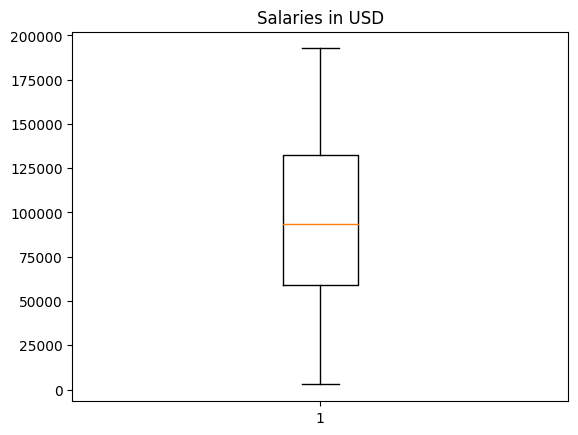

In [208]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q1 + 1.5 * IQR


df = df[(df['salary_in_usd'] < upper_whisker) & (df['salary_in_usd'] > lower_whisker)]

display(df.info())

plt.figure()
plt.boxplot(df['salary_in_usd']) 
plt.title('Salaries in USD')
plt.show()

In [209]:
conditions = [(df['salary_in_usd']<=100000), (df['salary_in_usd']>100000)]
values = ['LET Average',
          'HT Average']
df['salary_range'] = np.select(conditions, values)

# Recall: Statstical info and description

In [210]:
display(df.info())
display(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 605
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           541 non-null    object
 1   experience_level    541 non-null    object
 2   employment_type     541 non-null    object
 3   job_title           541 non-null    object
 4   salary_in_usd       541 non-null    int64 
 5   employee_residence  541 non-null    object
 6   remote_ratio        541 non-null    object
 7   company_location    541 non-null    object
 8   company_size        541 non-null    object
 9   salary_range        541 non-null    object
dtypes: int64(1), object(9)
memory usage: 46.5+ KB


None

work_year experience_level employment_type      job_title  \
count        541              541             541            541   
unique         3                4               4              3   
top         2022     Senior-Levle       Full-Time  Data Engineer   
freq         279              238             524            216   
mean         NaN              NaN             NaN            NaN   
std          NaN              NaN             NaN            NaN   
min          NaN              NaN             NaN            NaN   
25%          NaN              NaN             NaN            NaN   
50%          NaN              NaN             NaN            NaN   
75%          NaN              NaN             NaN            NaN   
max          NaN              NaN             NaN            NaN   

        salary_in_usd employee_residence remote_ratio company_location  \
count      541.000000                541          541              541   
unique            NaN                 56            3               50   
top               NaN      United States       Remote    United States   
freq              NaN                271          331              293   
mean     95403.722736                NaN          NaN              NaN   
std      47551.128776                NaN          NaN              NaN   
min       2859.000000                NaN          NaN              NaN   
25%      59102.000000                NaN          NaN              NaN   
50%      93700.000000                NaN          NaN              NaN   
75%     132320.000000                NaN          NaN              NaN   
max     192600.000000                NaN          NaN              NaN   

       company_size salary_range  
count           541          541  
unique            3            2  
top          Medium  LET Average  
freq            293          302  
mean            NaN          NaN  
std             NaN          NaN  
min             NaN          NaN  
25%             NaN          NaN  
50%             NaN          NaN  
75%             NaN          NaN  
max             NaN          NaN

## Model Planning

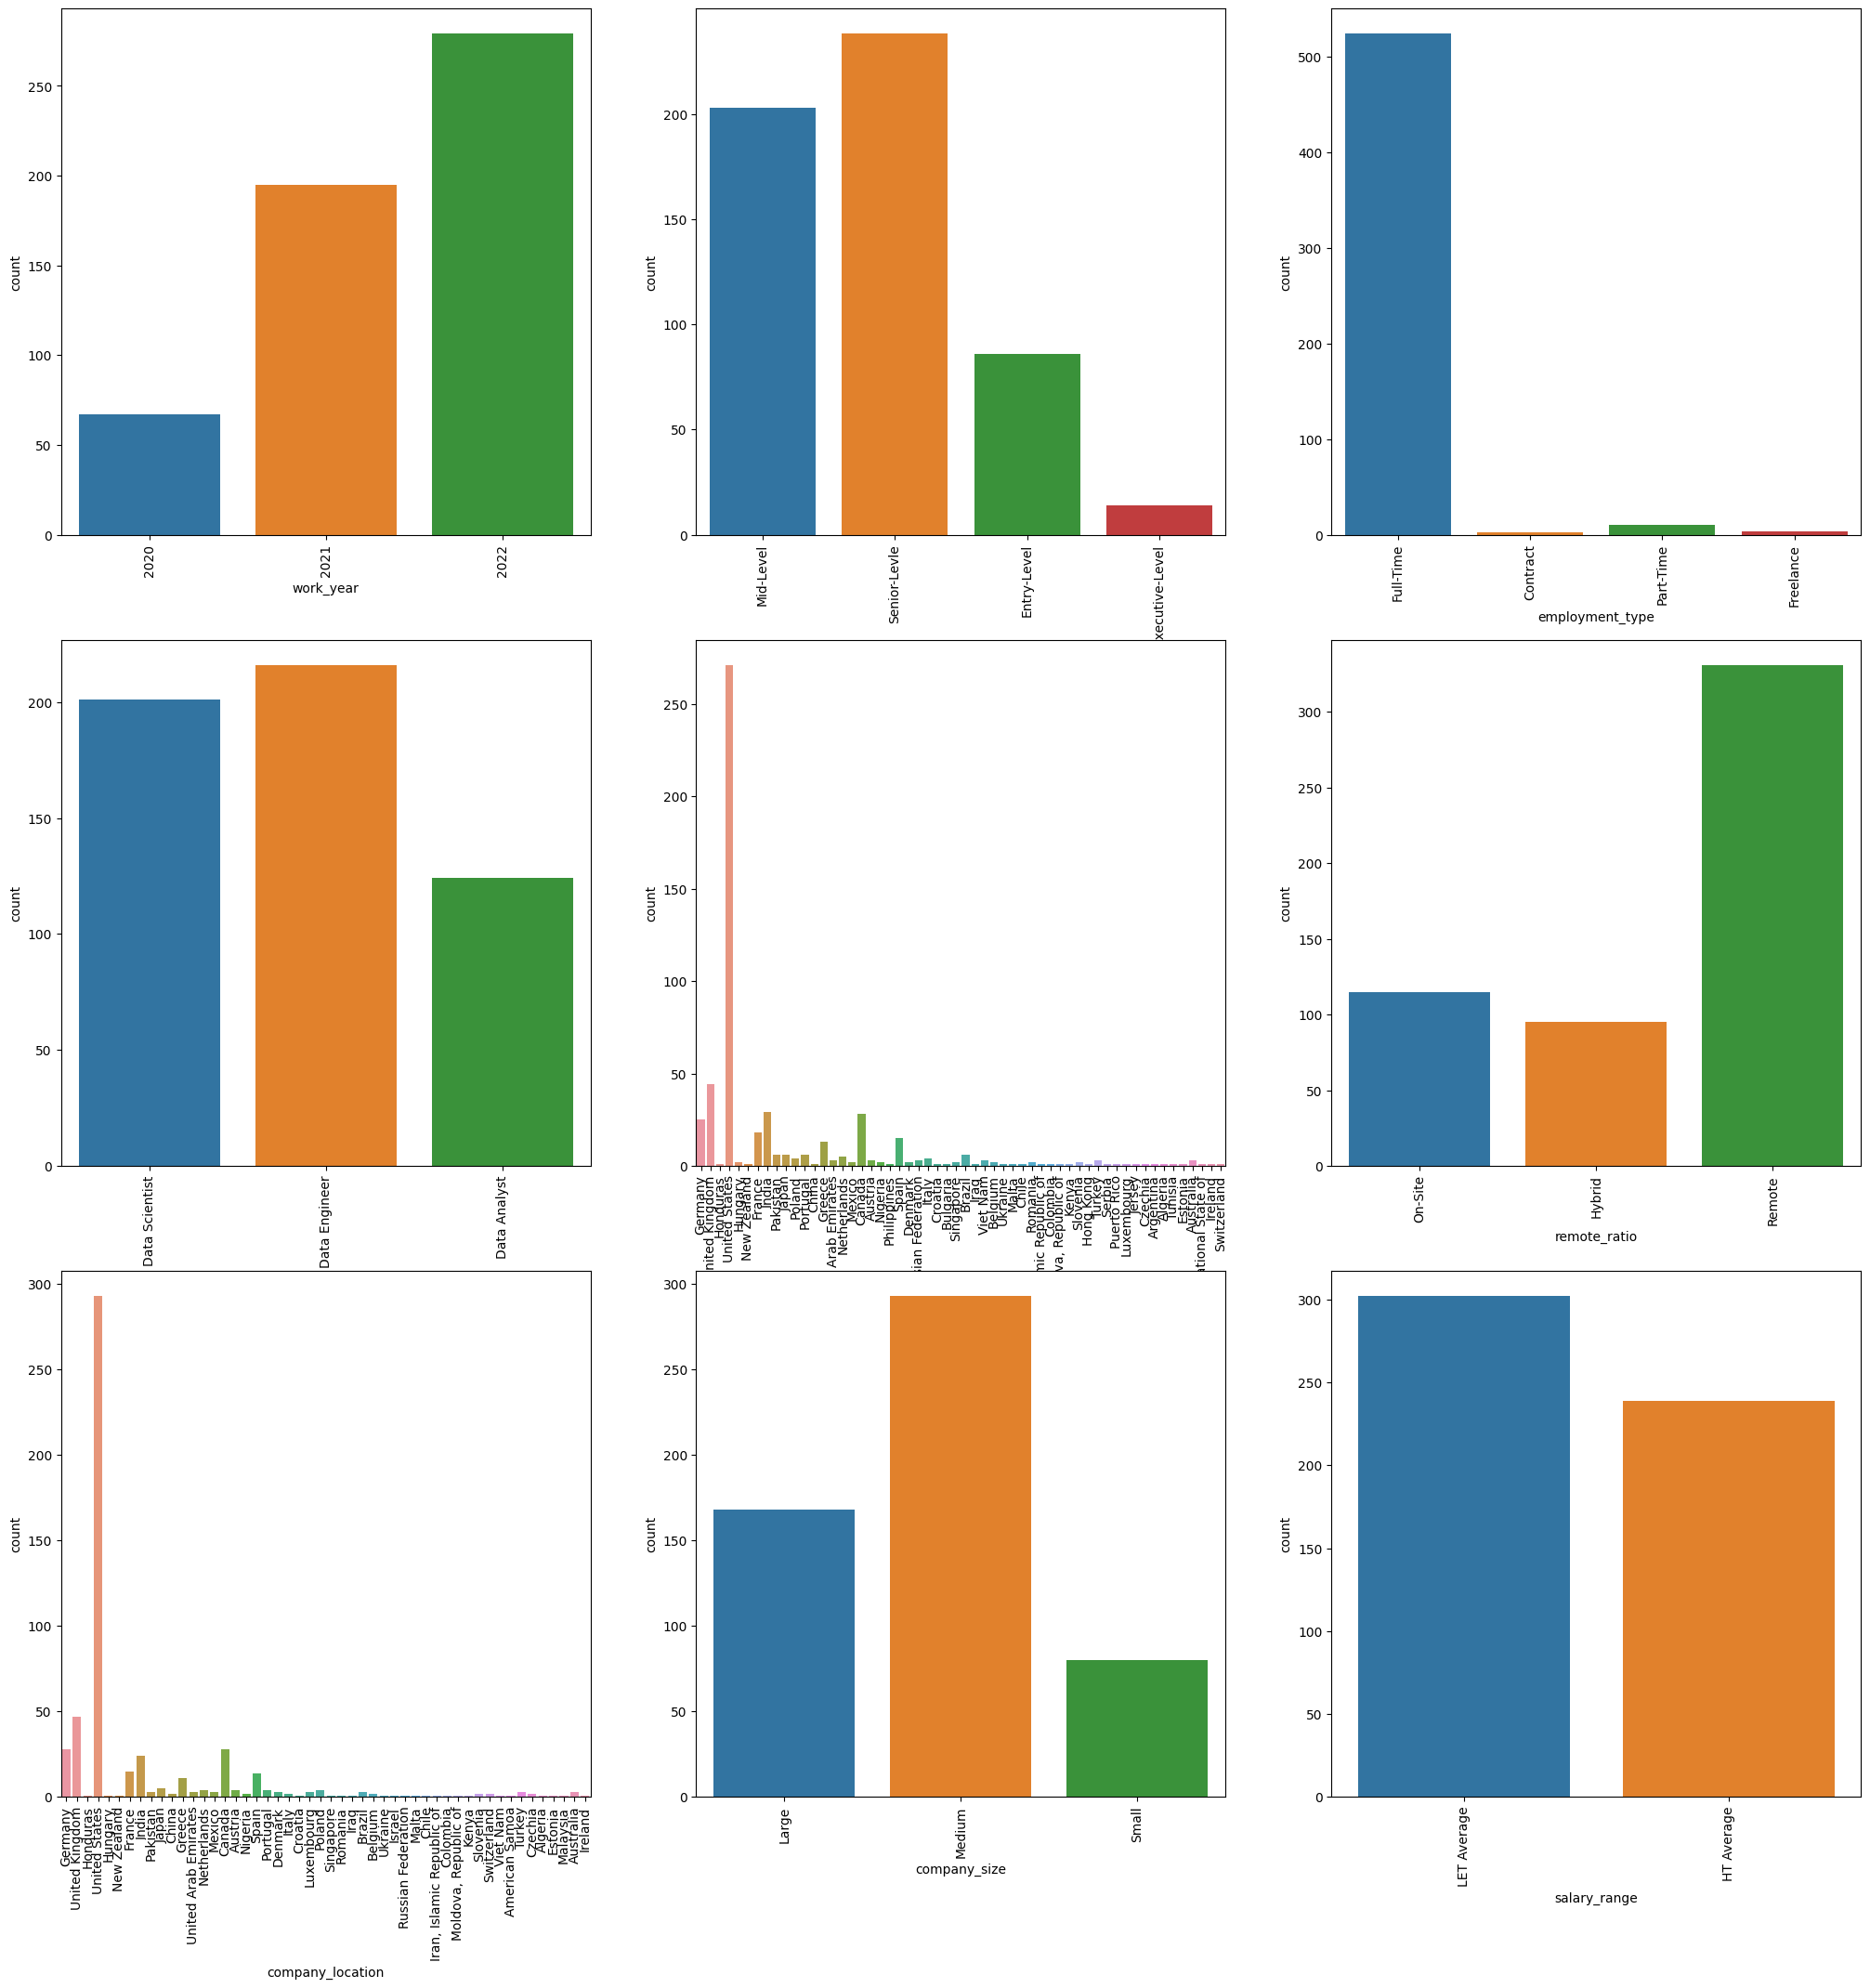

In [211]:
categorical = df.select_dtypes(include='object').columns
numerical = df.select_dtypes(exclude='object').columns
kCols = 3
kRows = 3

fig,axes = plt.subplots(kRows, kCols, figsize=(25,25))
for index,column in enumerate(categorical):
    axis=axes.flatten()[index]
    sns.countplot(x=column, data=df, ax=axis)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
plt.show()

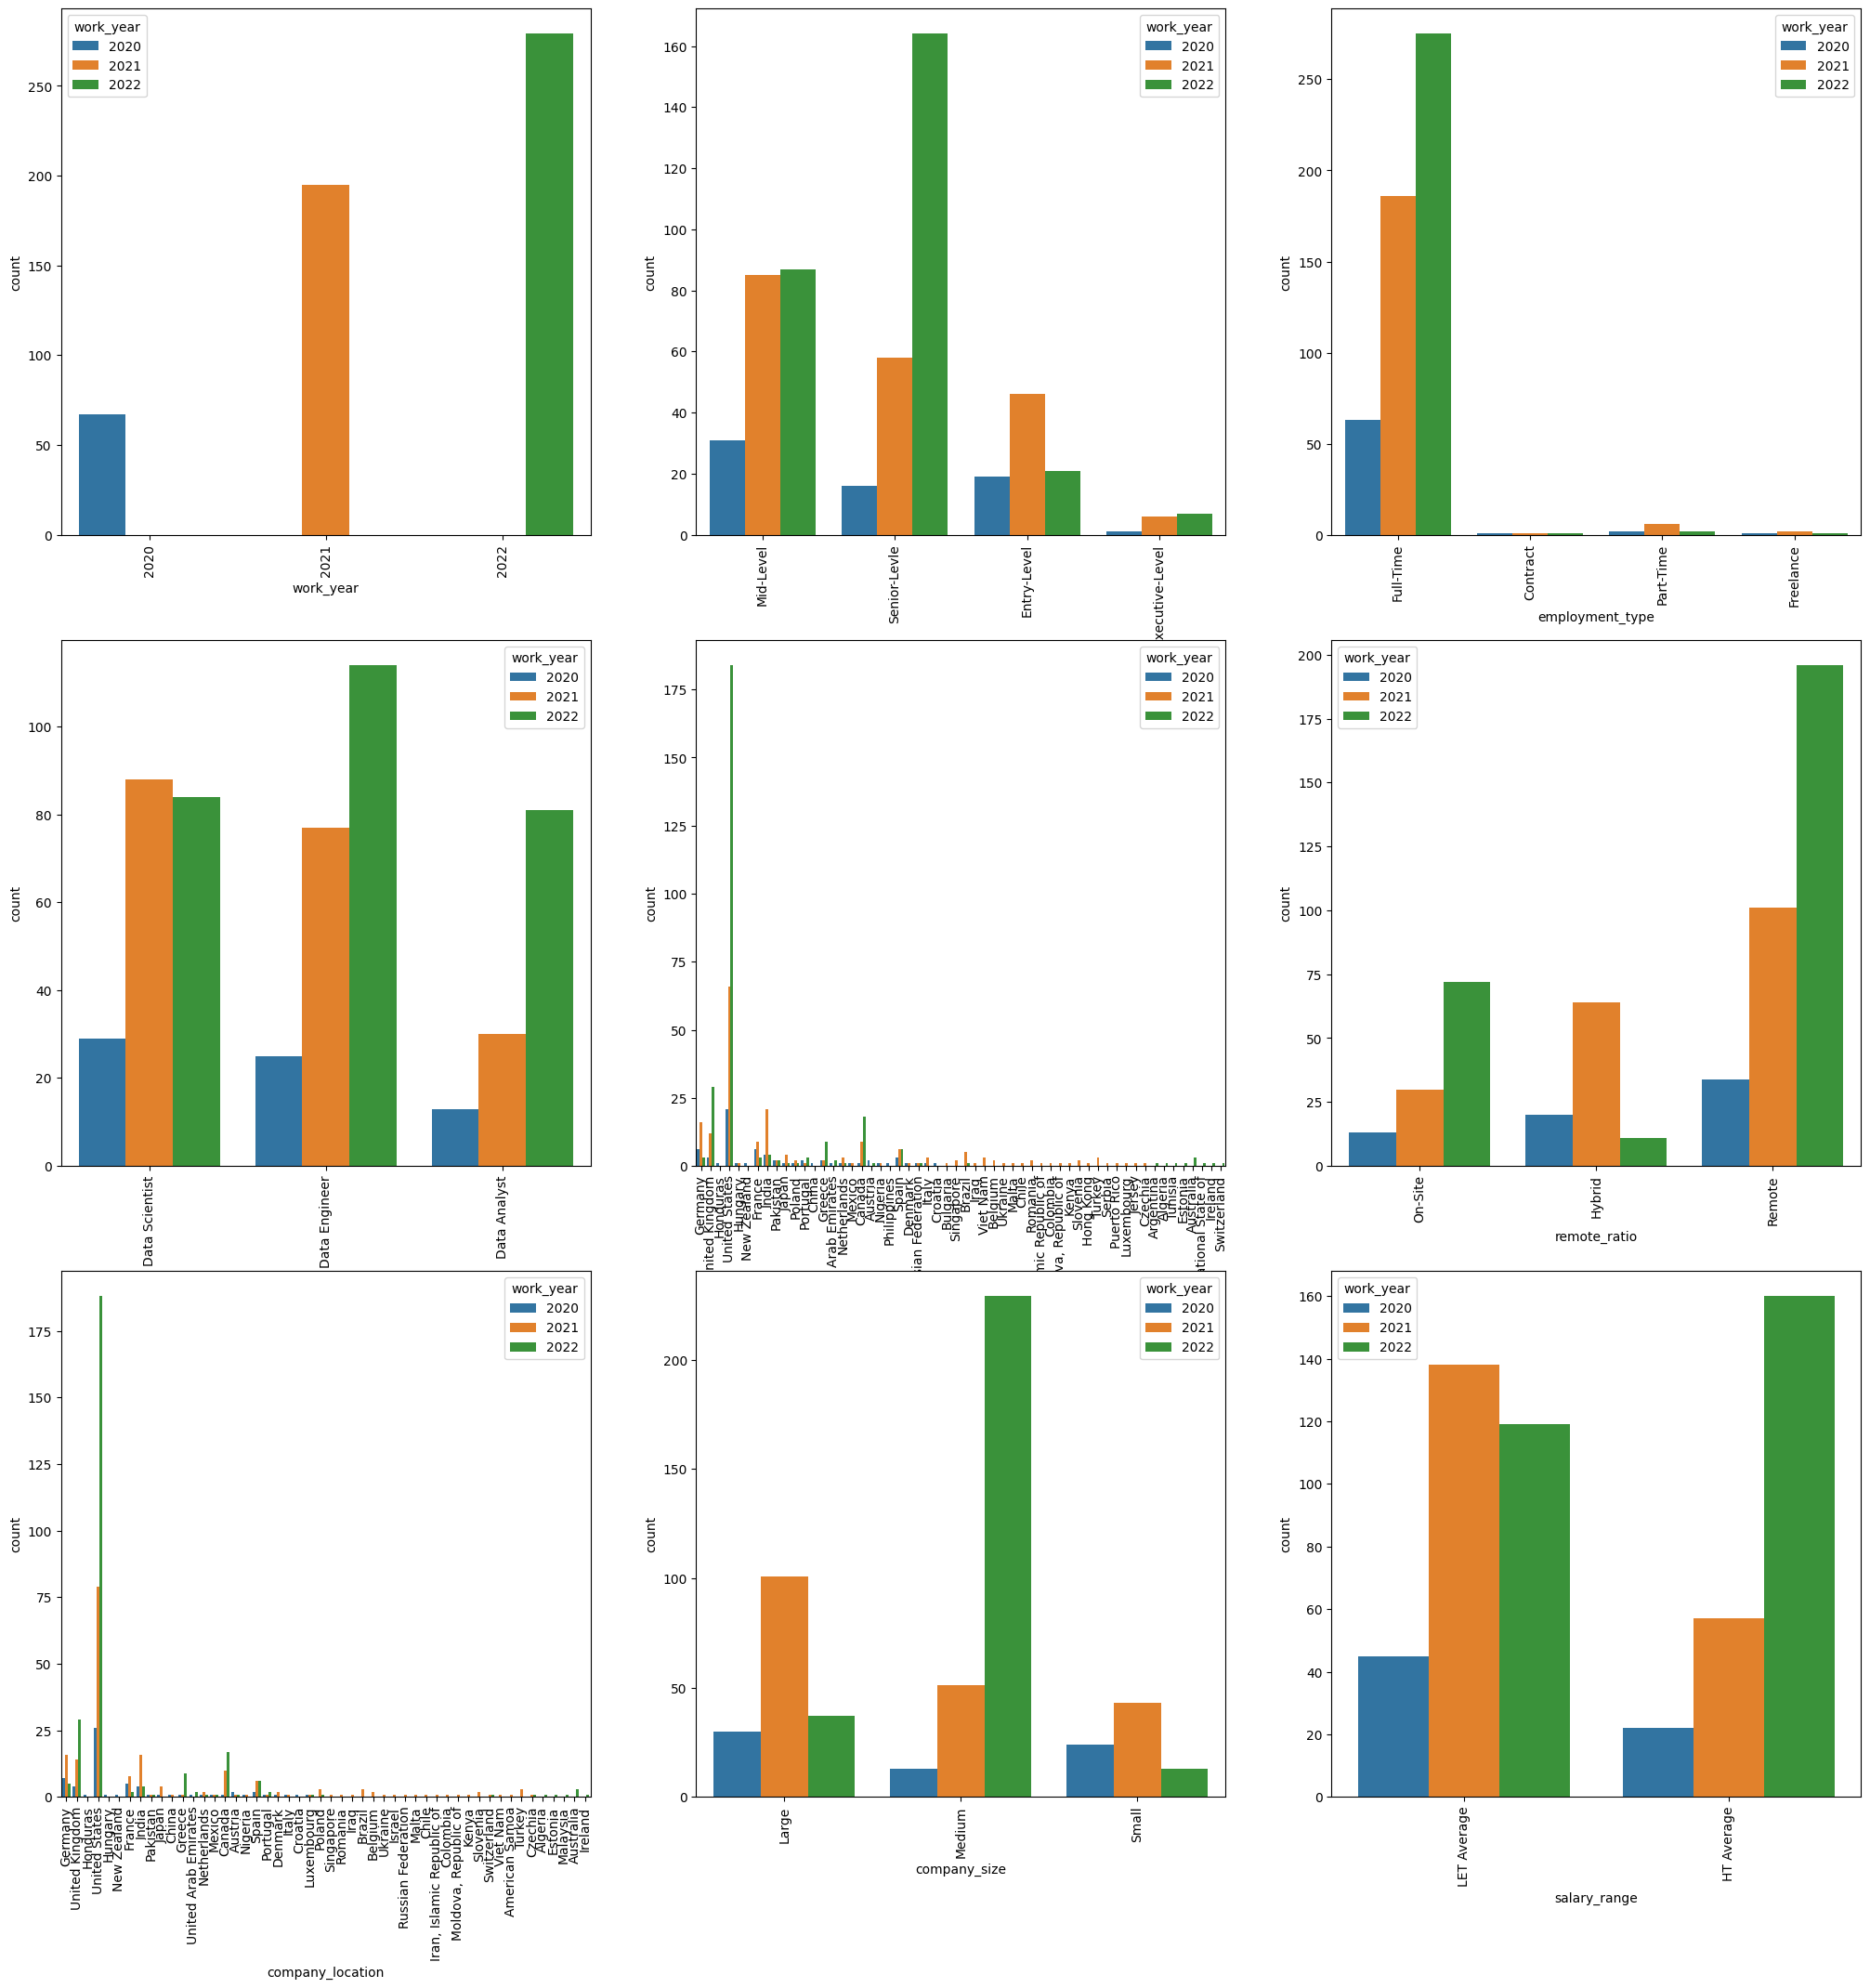

In [212]:
fig,axes = plt.subplots(kRows, kCols, figsize=(25,25))
for index,column in enumerate(categorical):
    axis=axes.flatten()[index]
    sns.countplot(x=column, hue='work_year', data=df, ax=axis)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
plt.show()

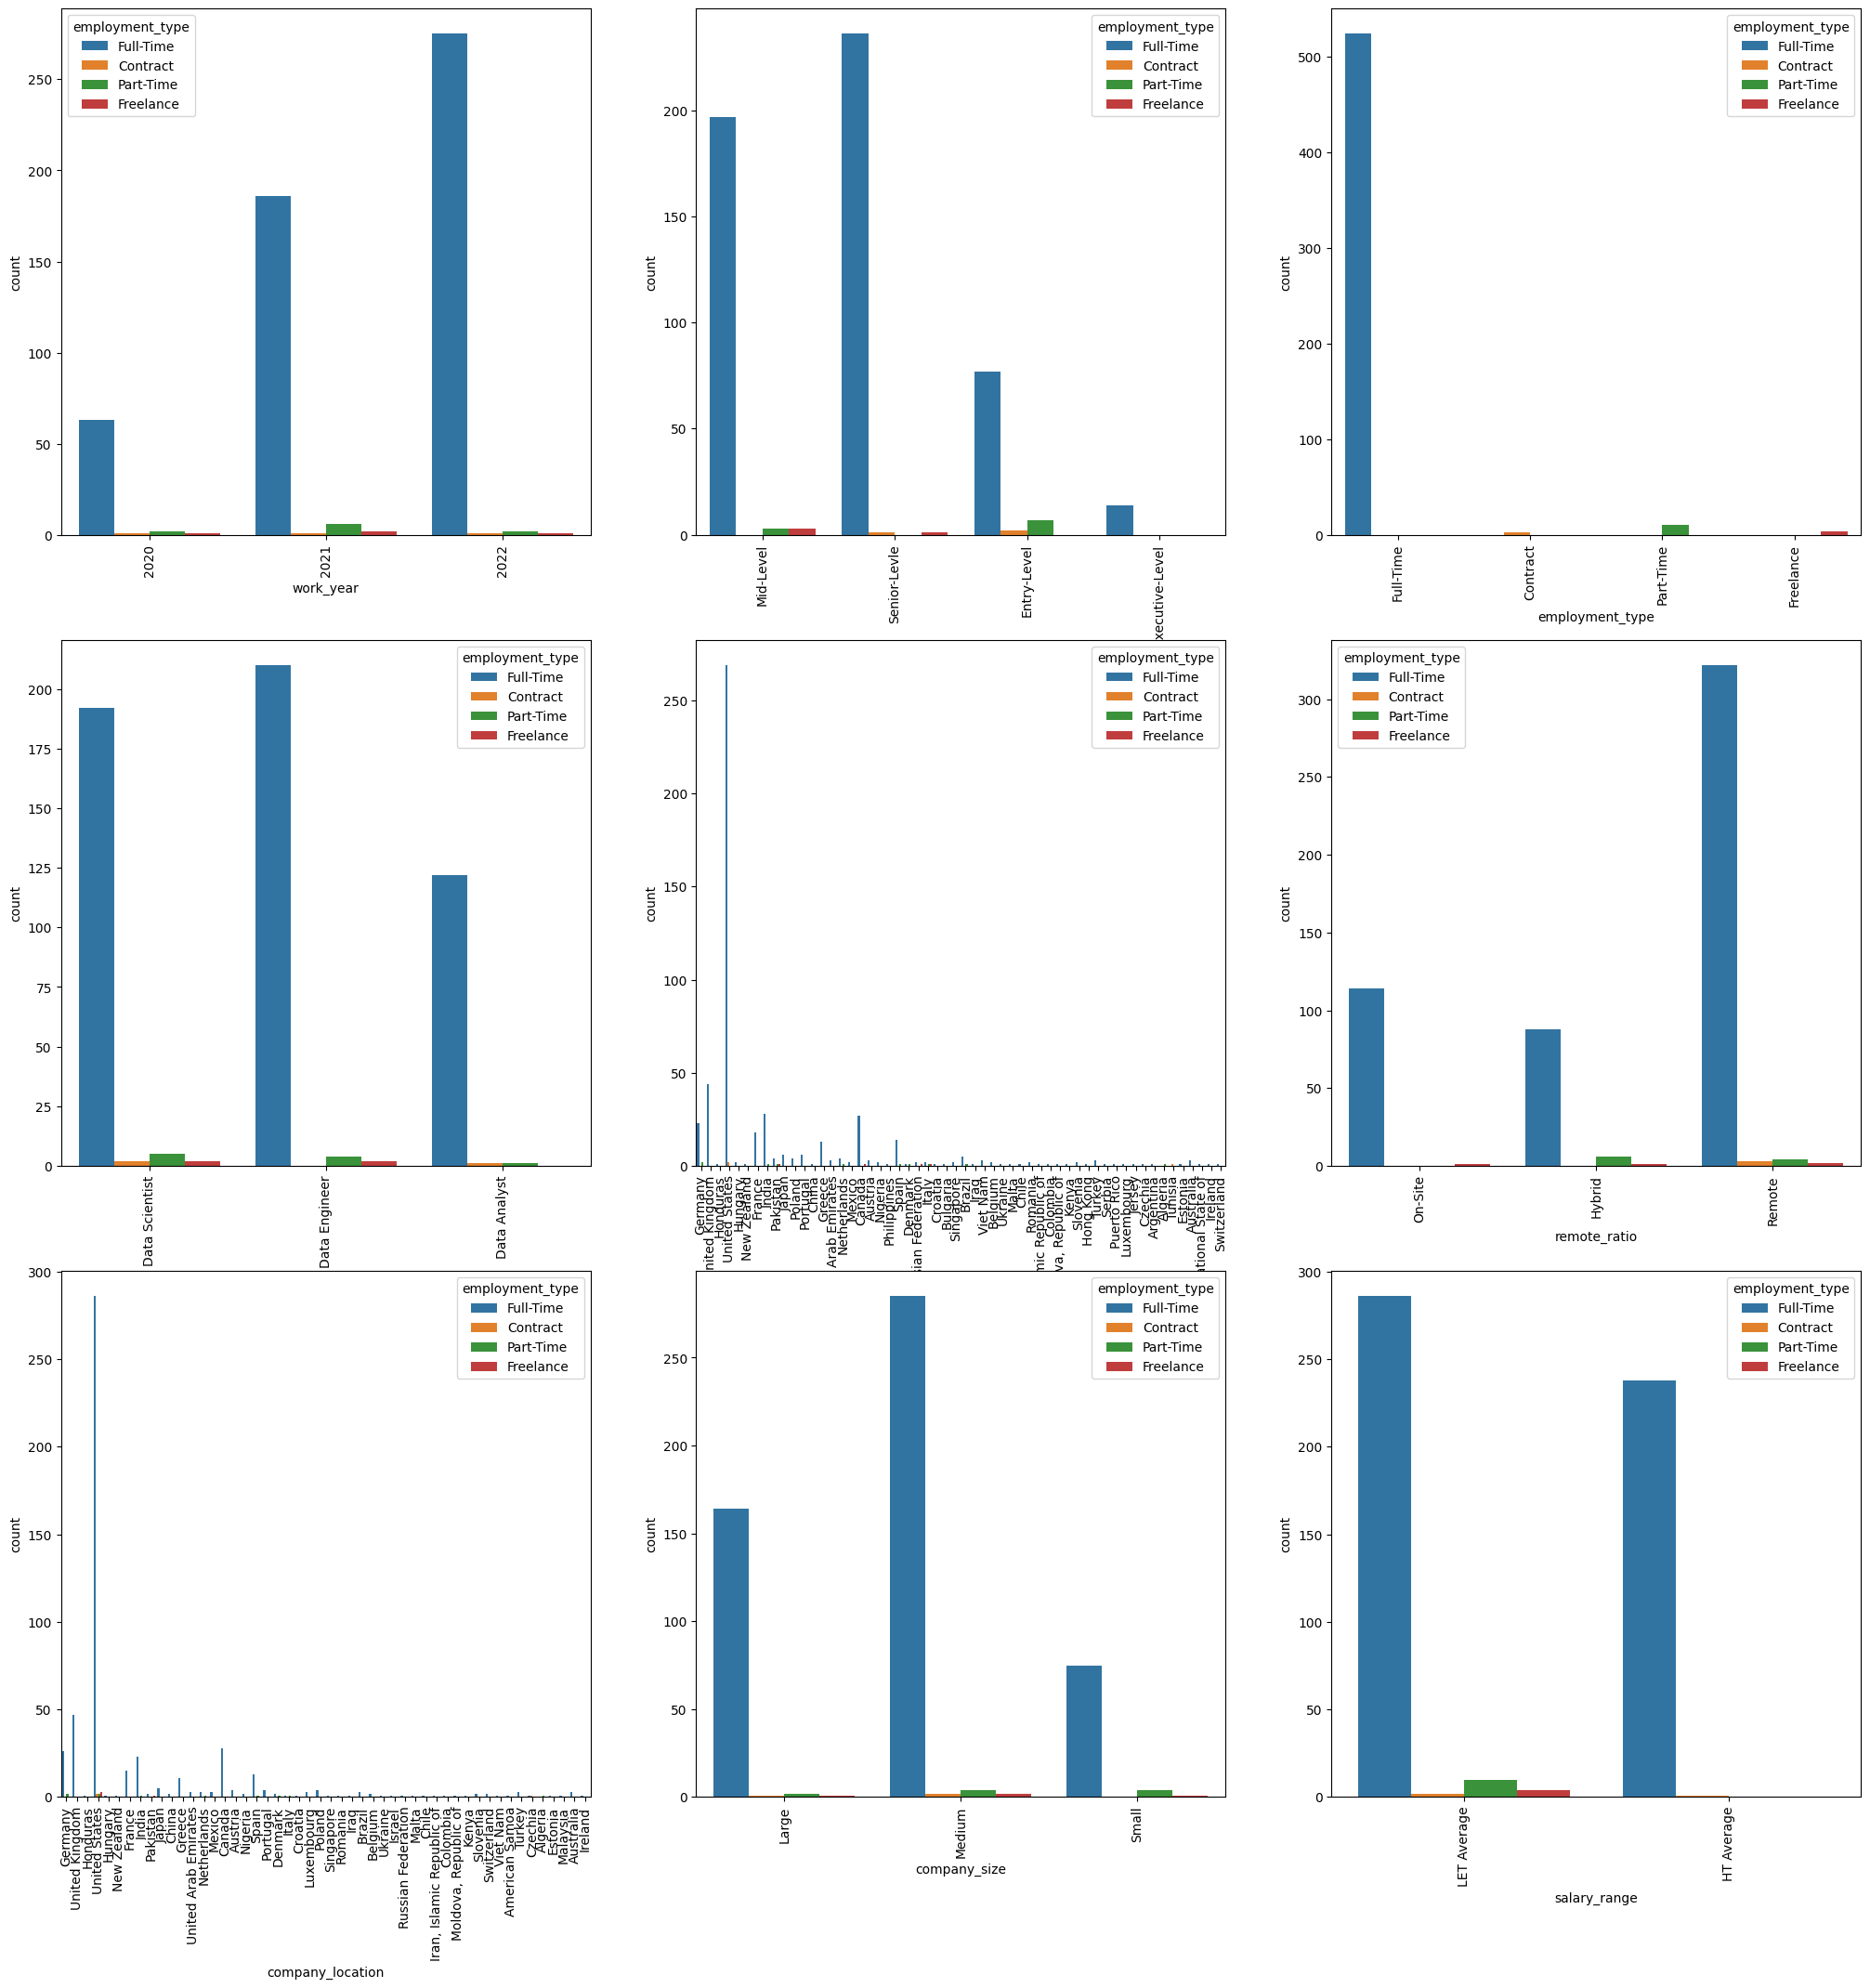

In [213]:
fig,axes = plt.subplots(kRows, kCols, figsize=(25,25))
for index,column in enumerate(categorical):
    axis=axes.flatten()[index]
    sns.countplot(x=column, hue='employment_type', data=df, ax=axis)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
plt.show()

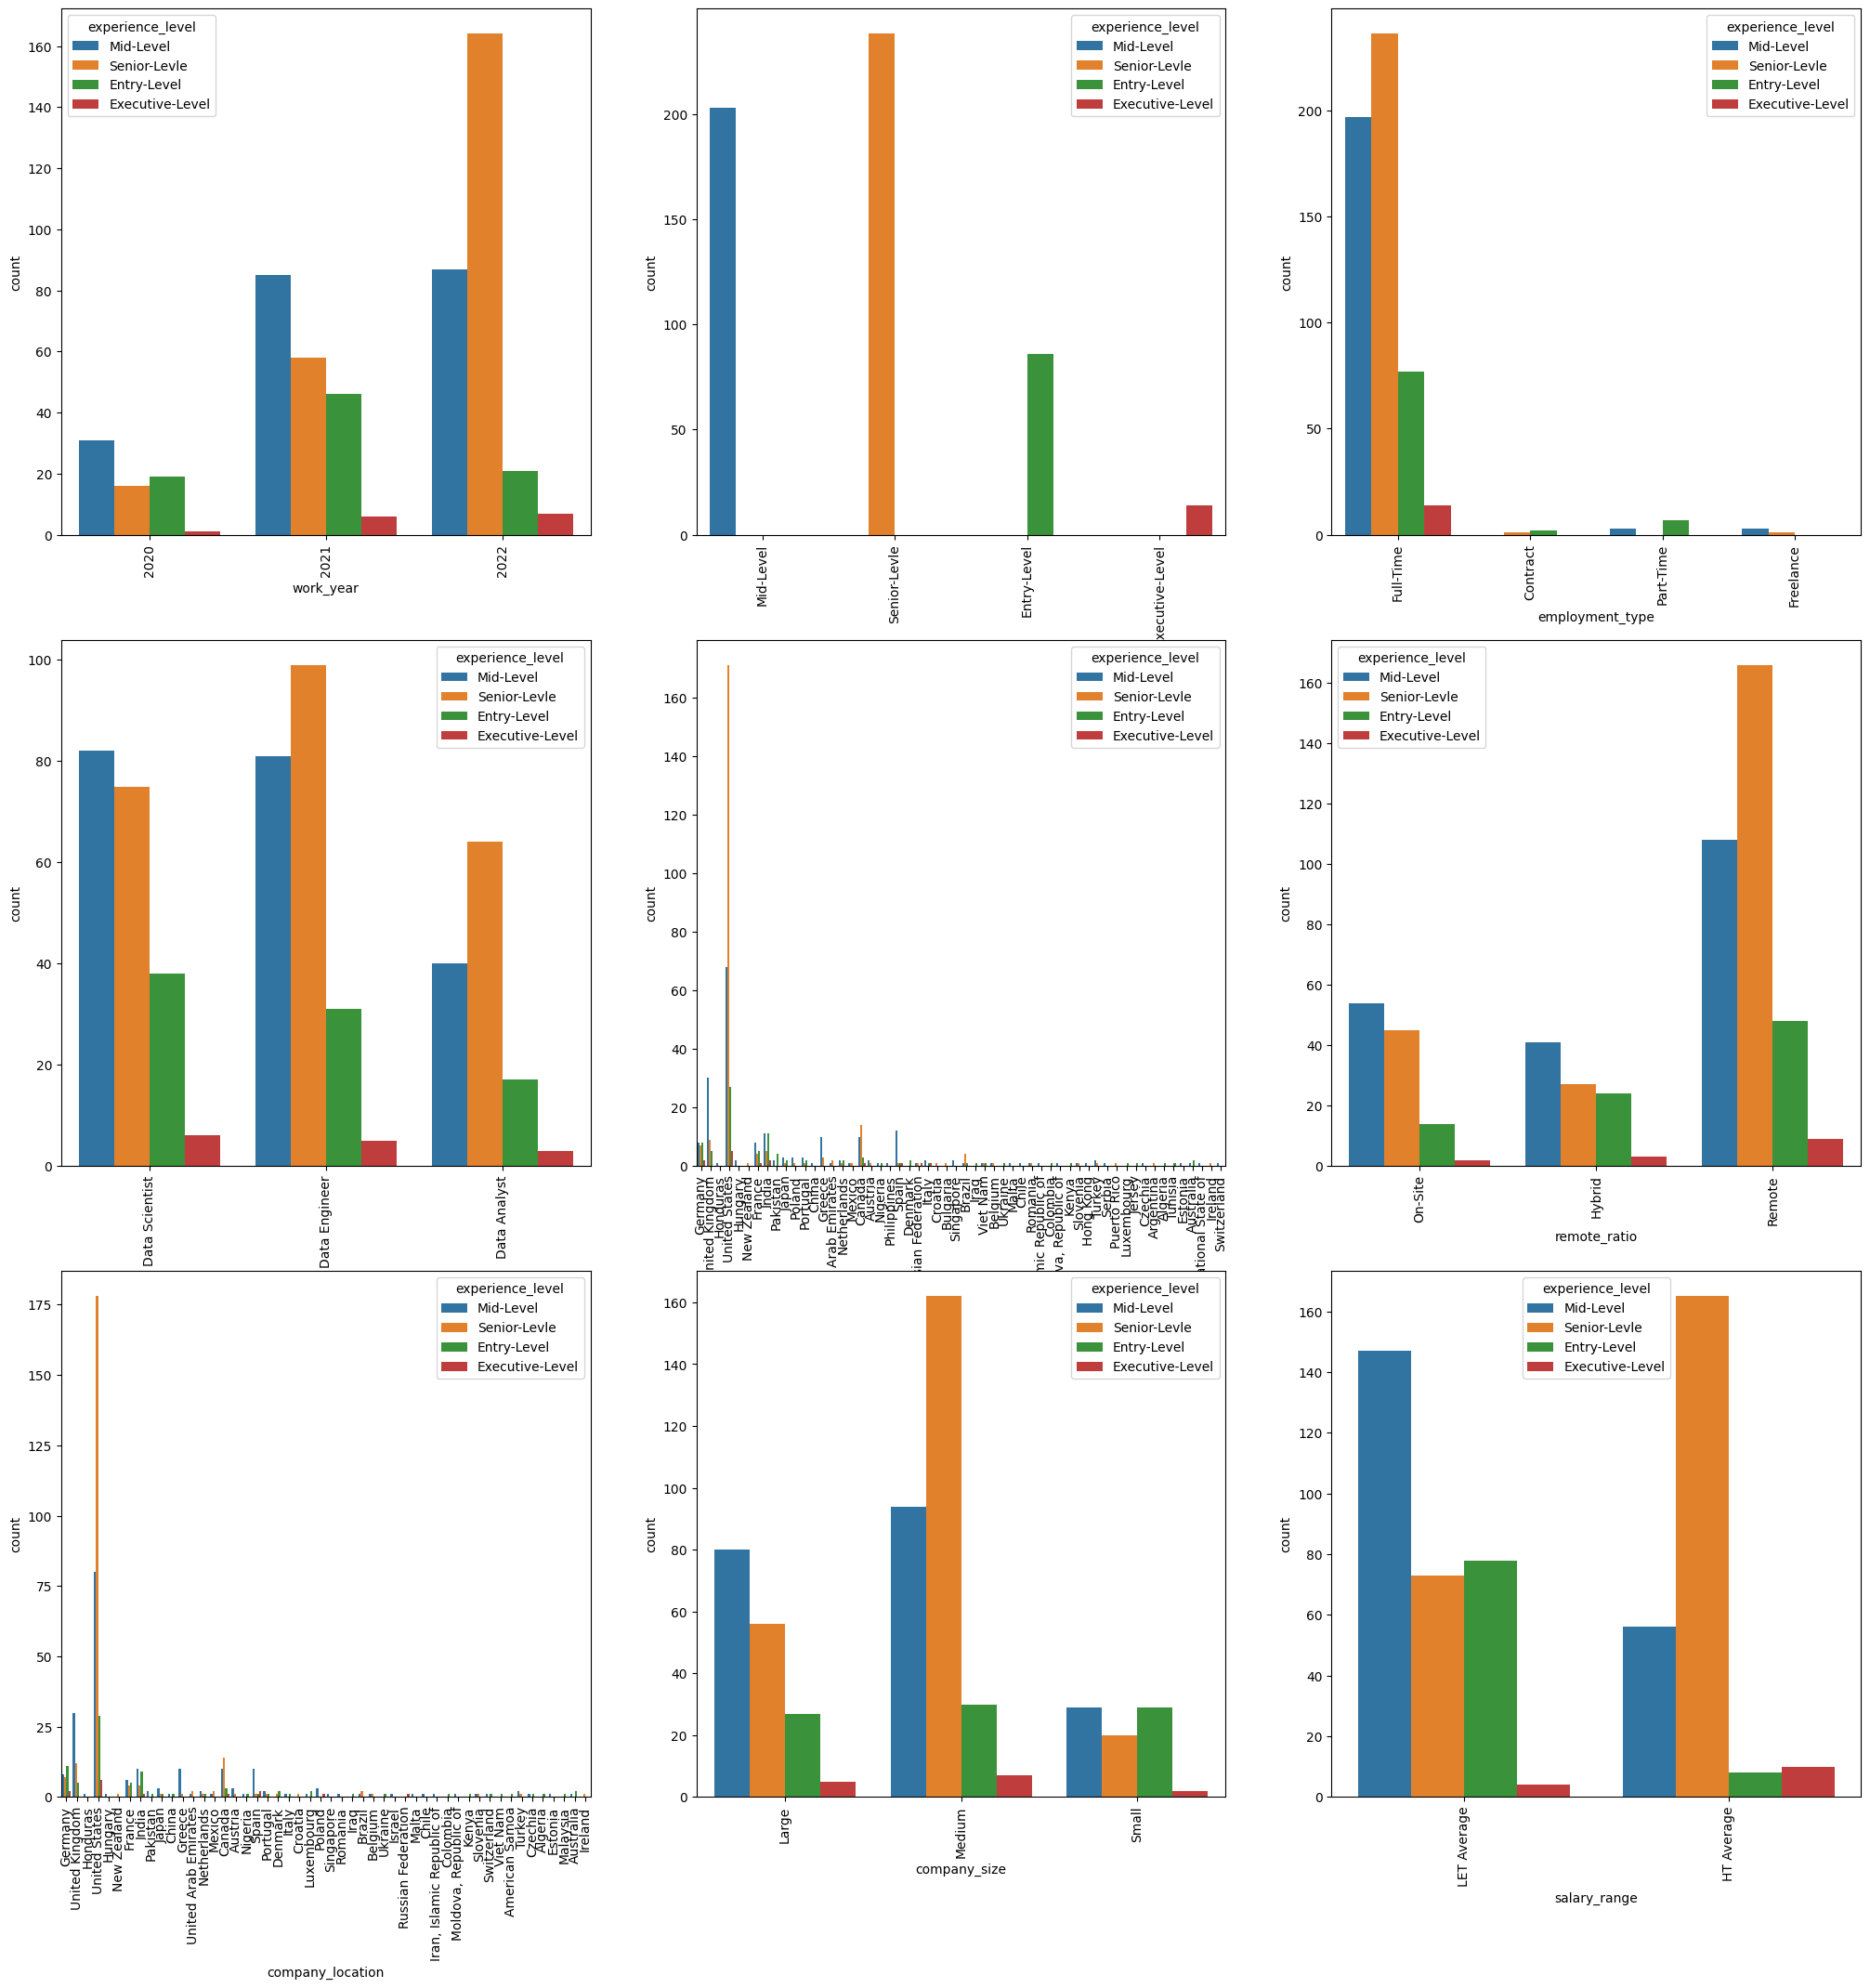

In [214]:
fig,axes = plt.subplots(kRows, kCols, figsize=(25,25))
for index,column in enumerate(categorical):
    axis=axes.flatten()[index]
    sns.countplot(x=column, hue='experience_level', data=df, ax=axis)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
plt.show()

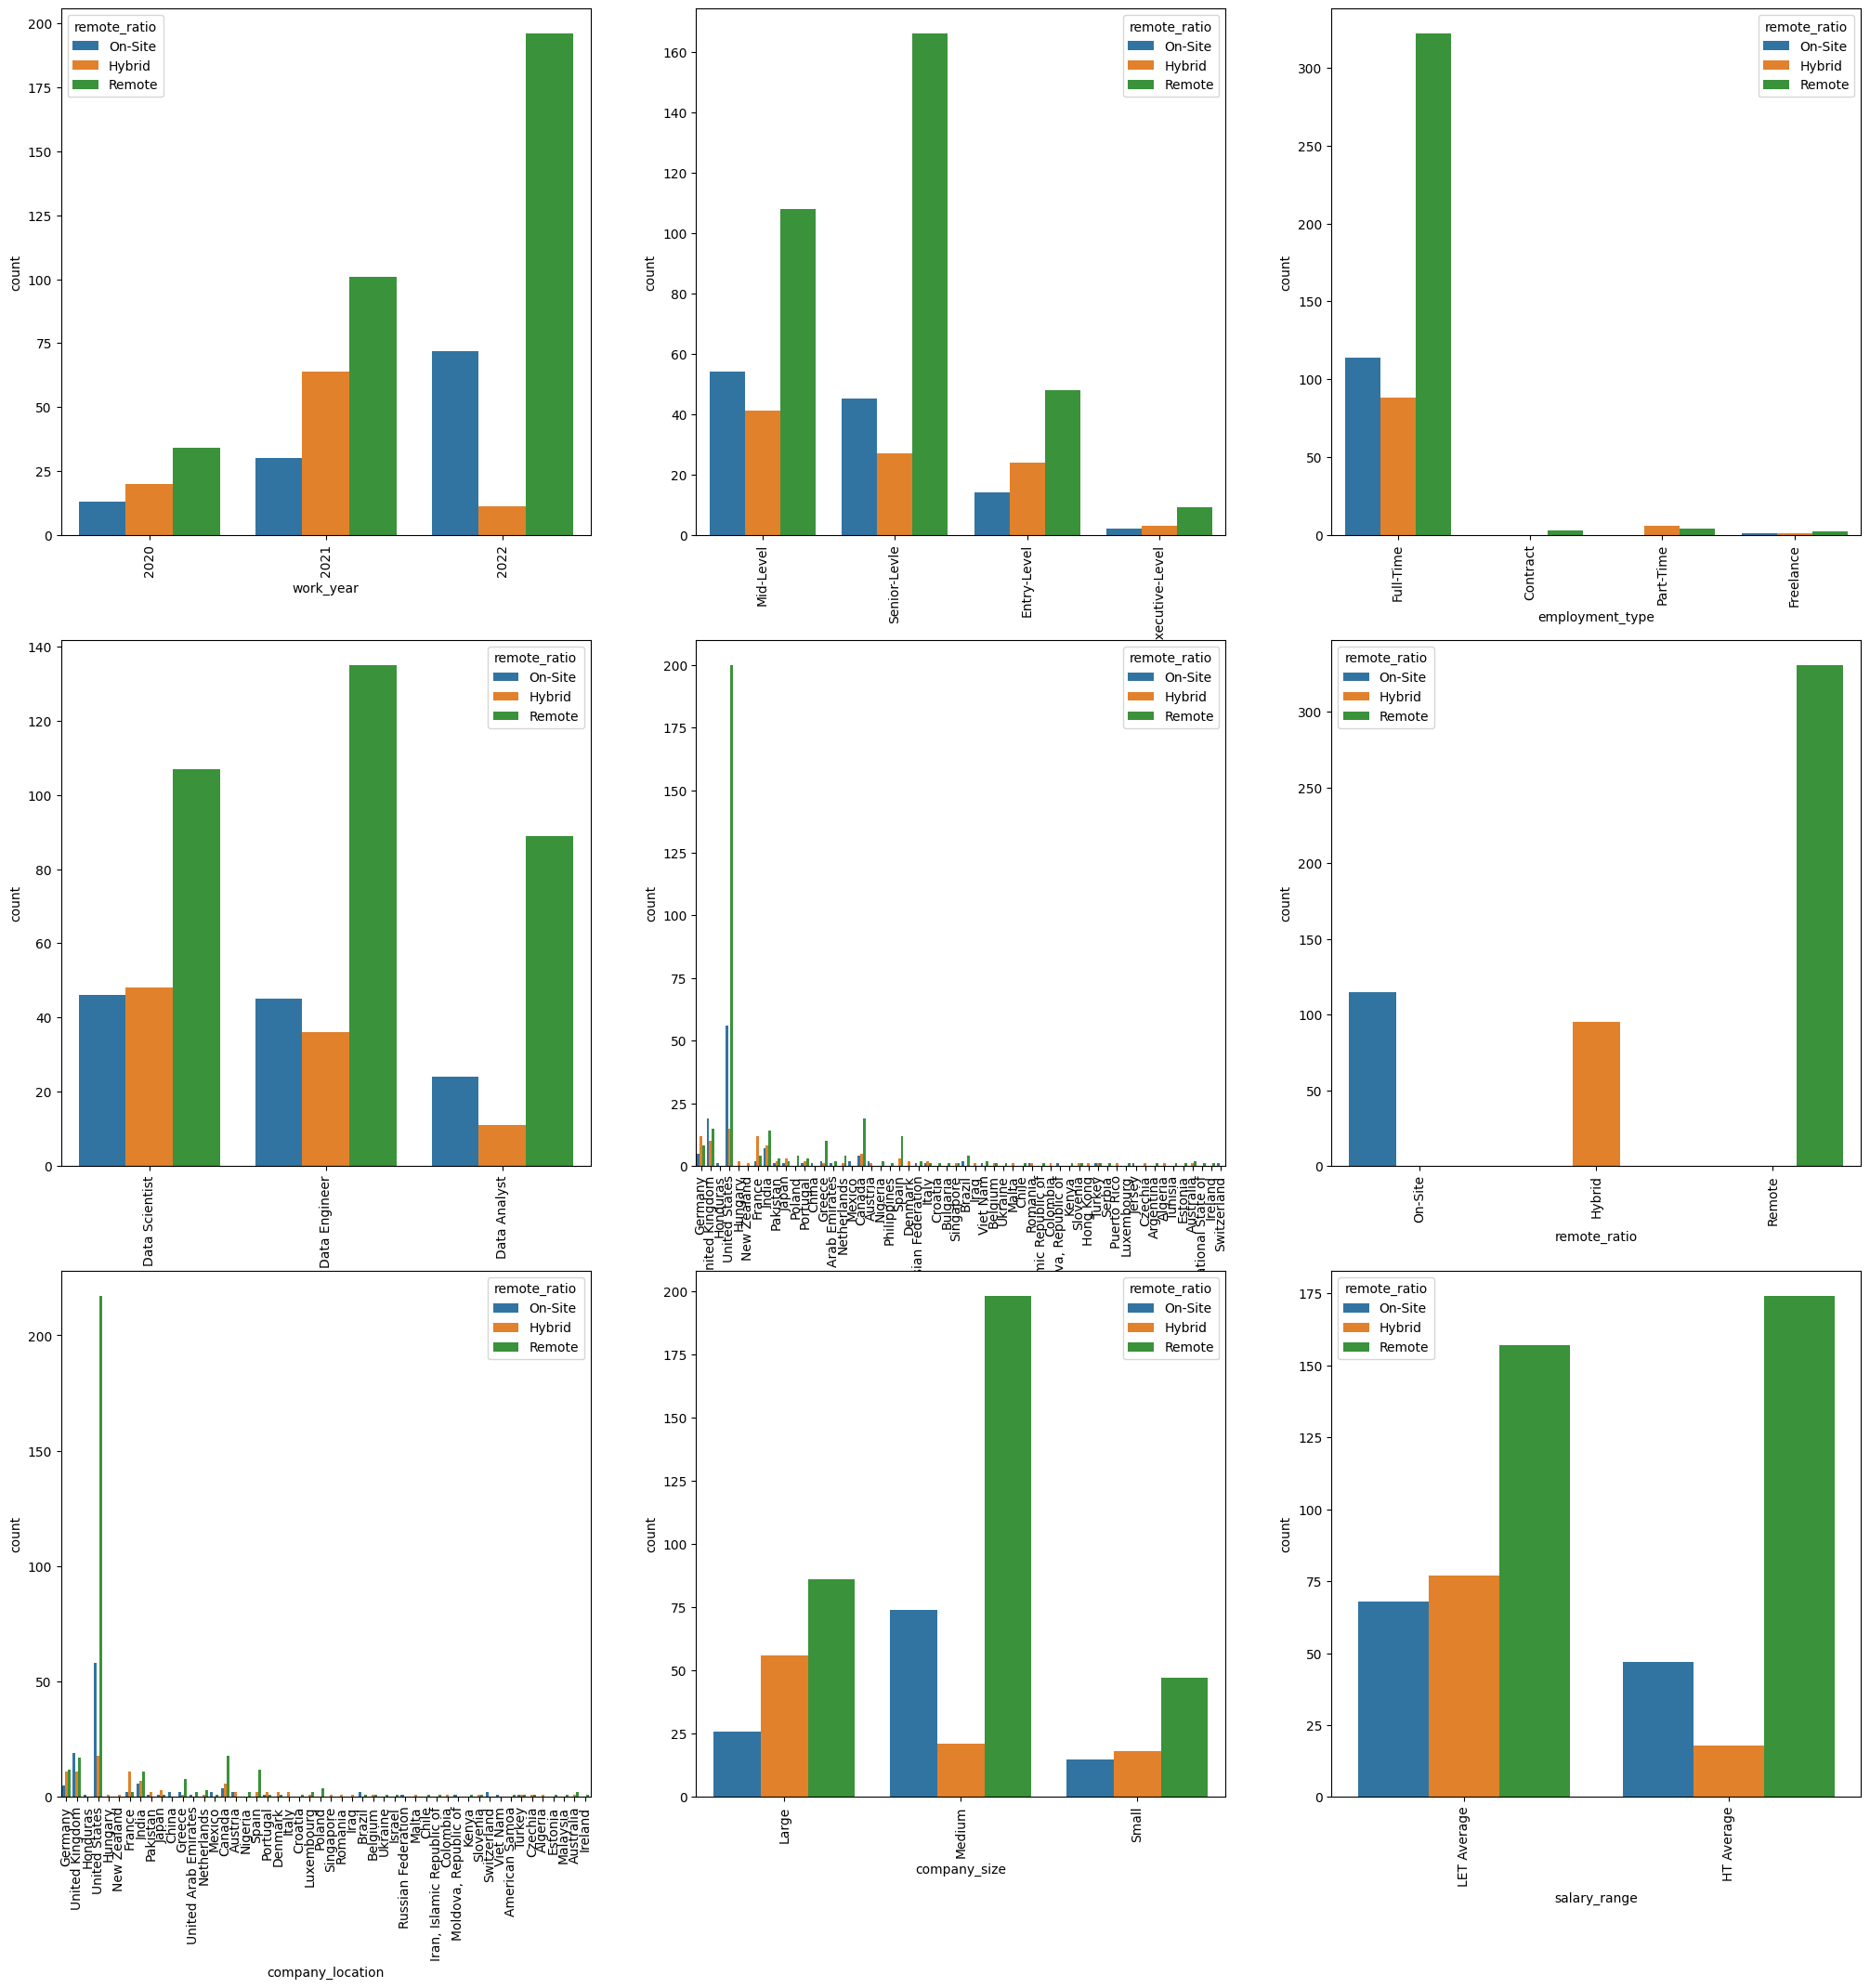

In [215]:
fig,axes = plt.subplots(kRows, kCols, figsize=(25,25))
for index,column in enumerate(categorical):
    axis=axes.flatten()[index]
    sns.countplot(x=column, hue='remote_ratio', data=df, ax=axis)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
plt.show()

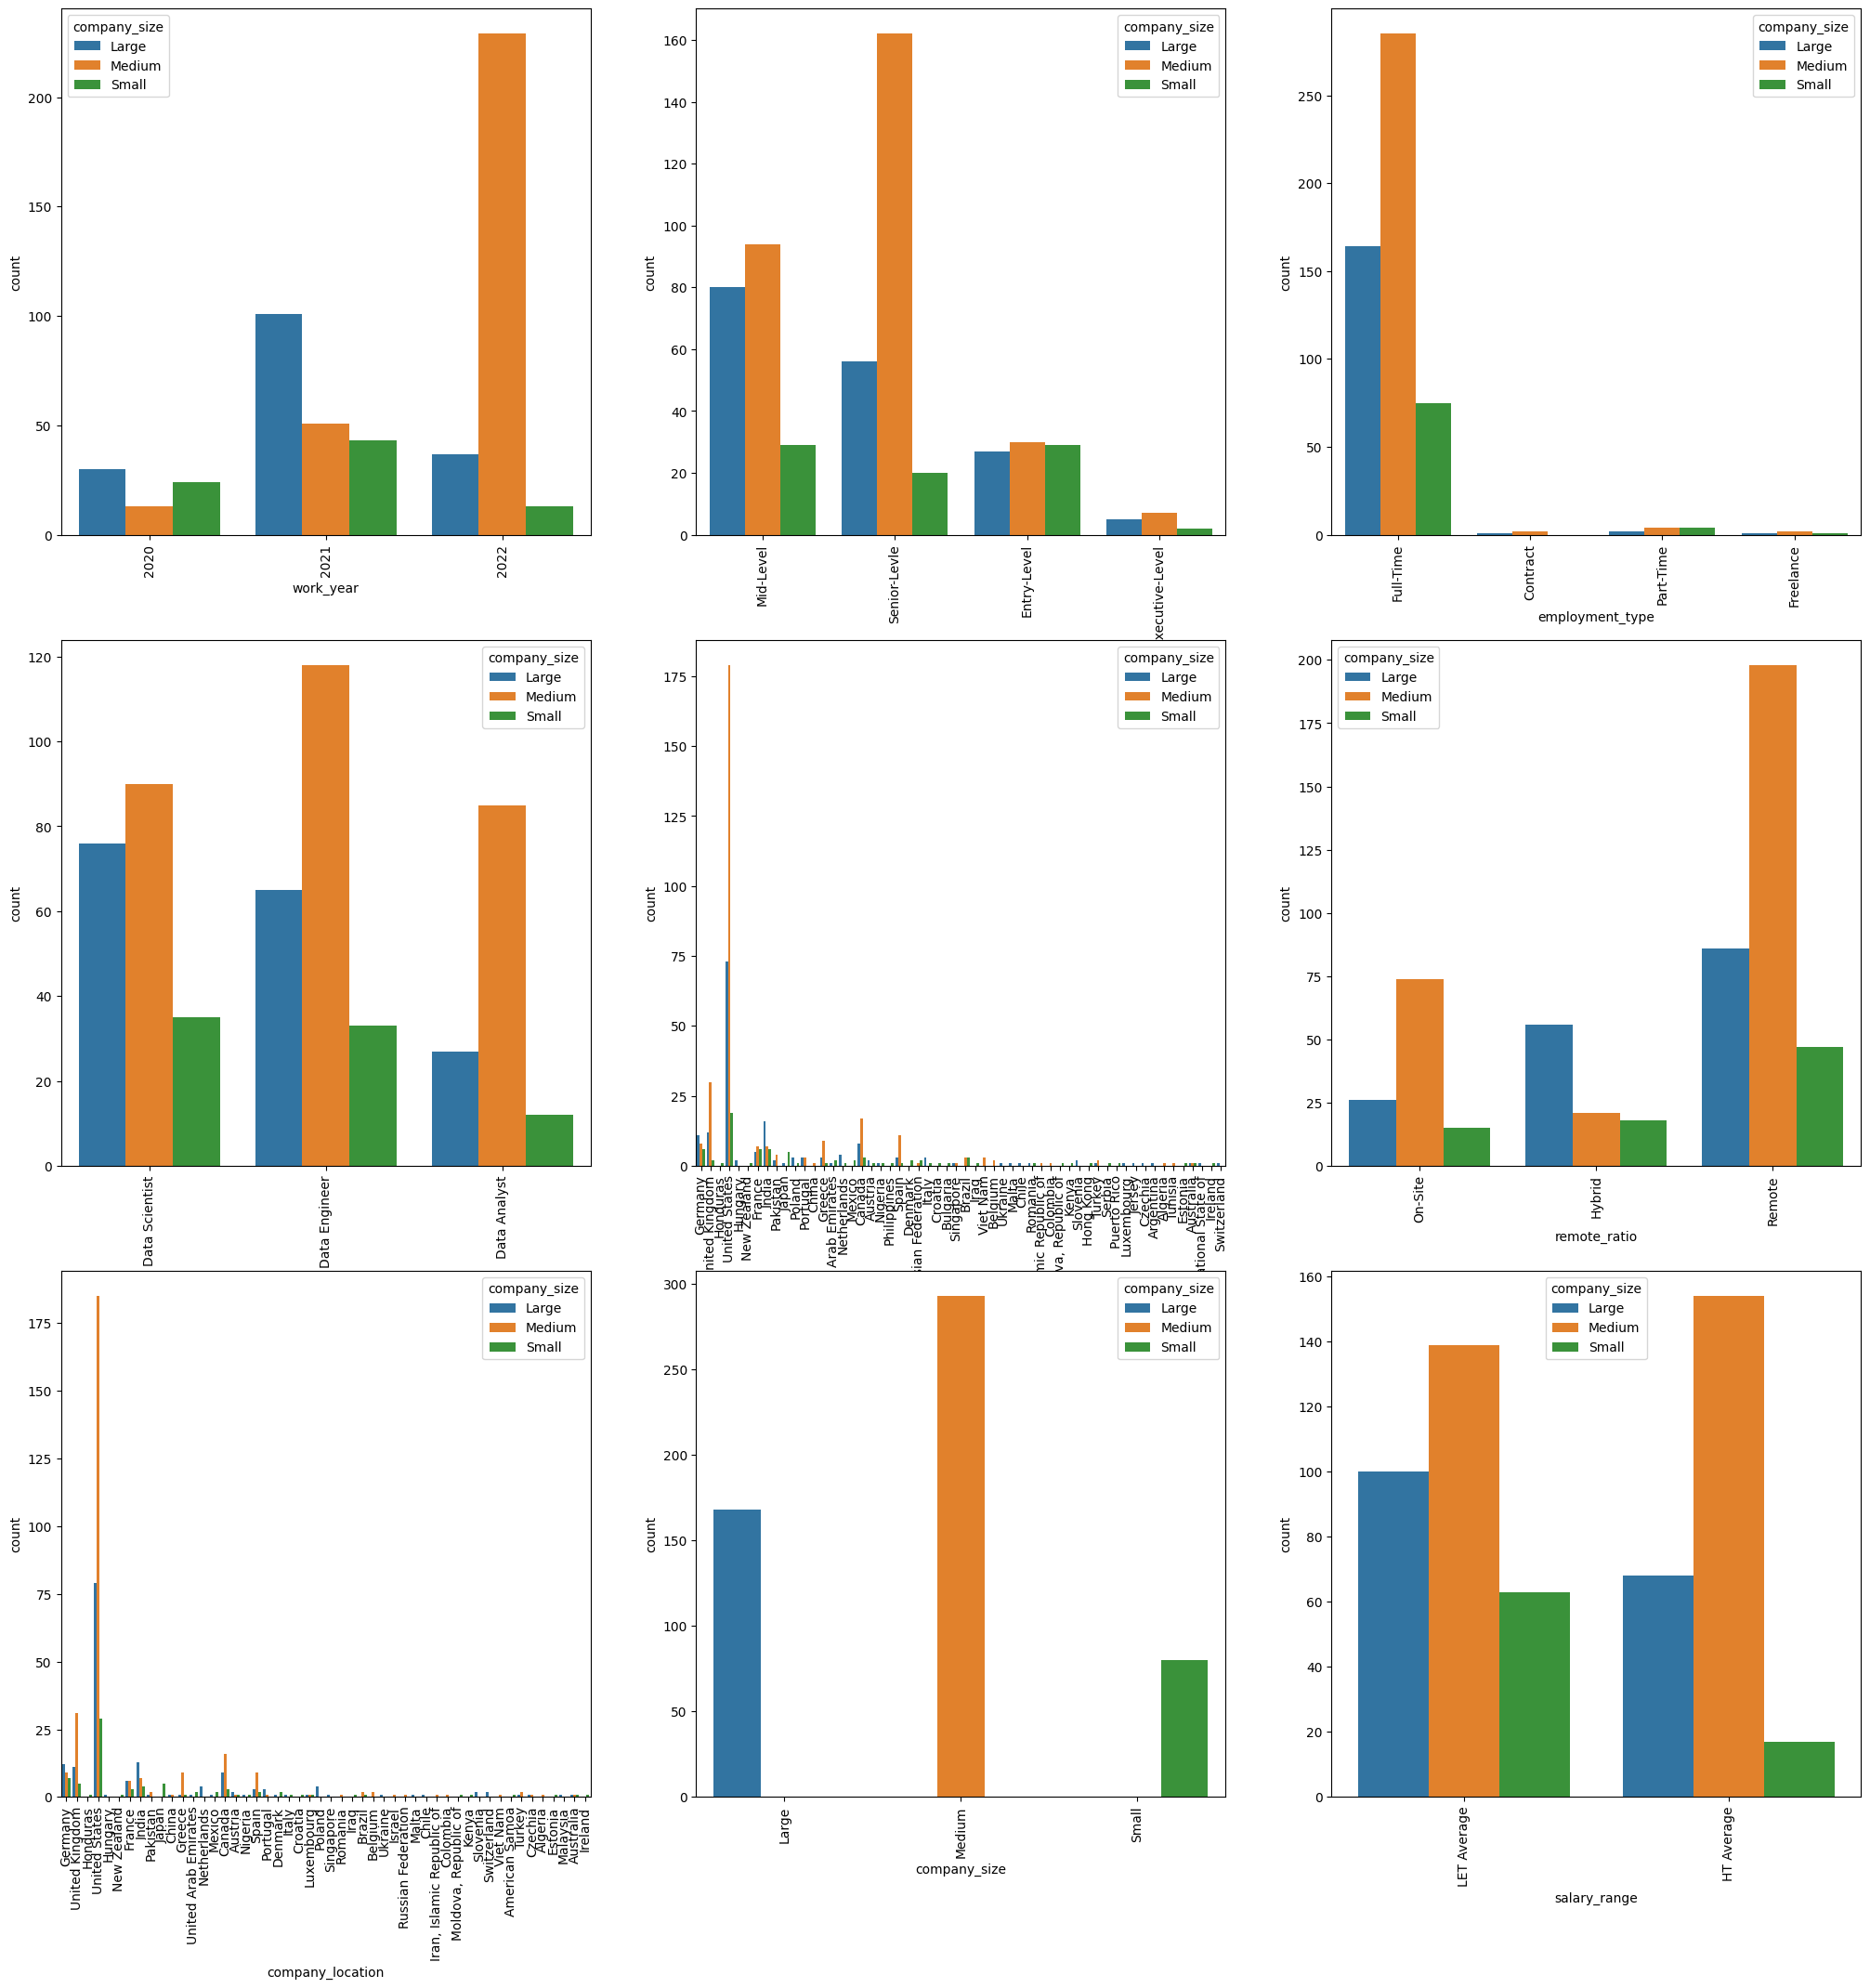

In [216]:
fig,axes = plt.subplots(kRows, kCols, figsize=(25,25))
for index,column in enumerate(categorical):
    axis=axes.flatten()[index]
    sns.countplot(x=column, hue='company_size', data=df, ax=axis)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
plt.show()

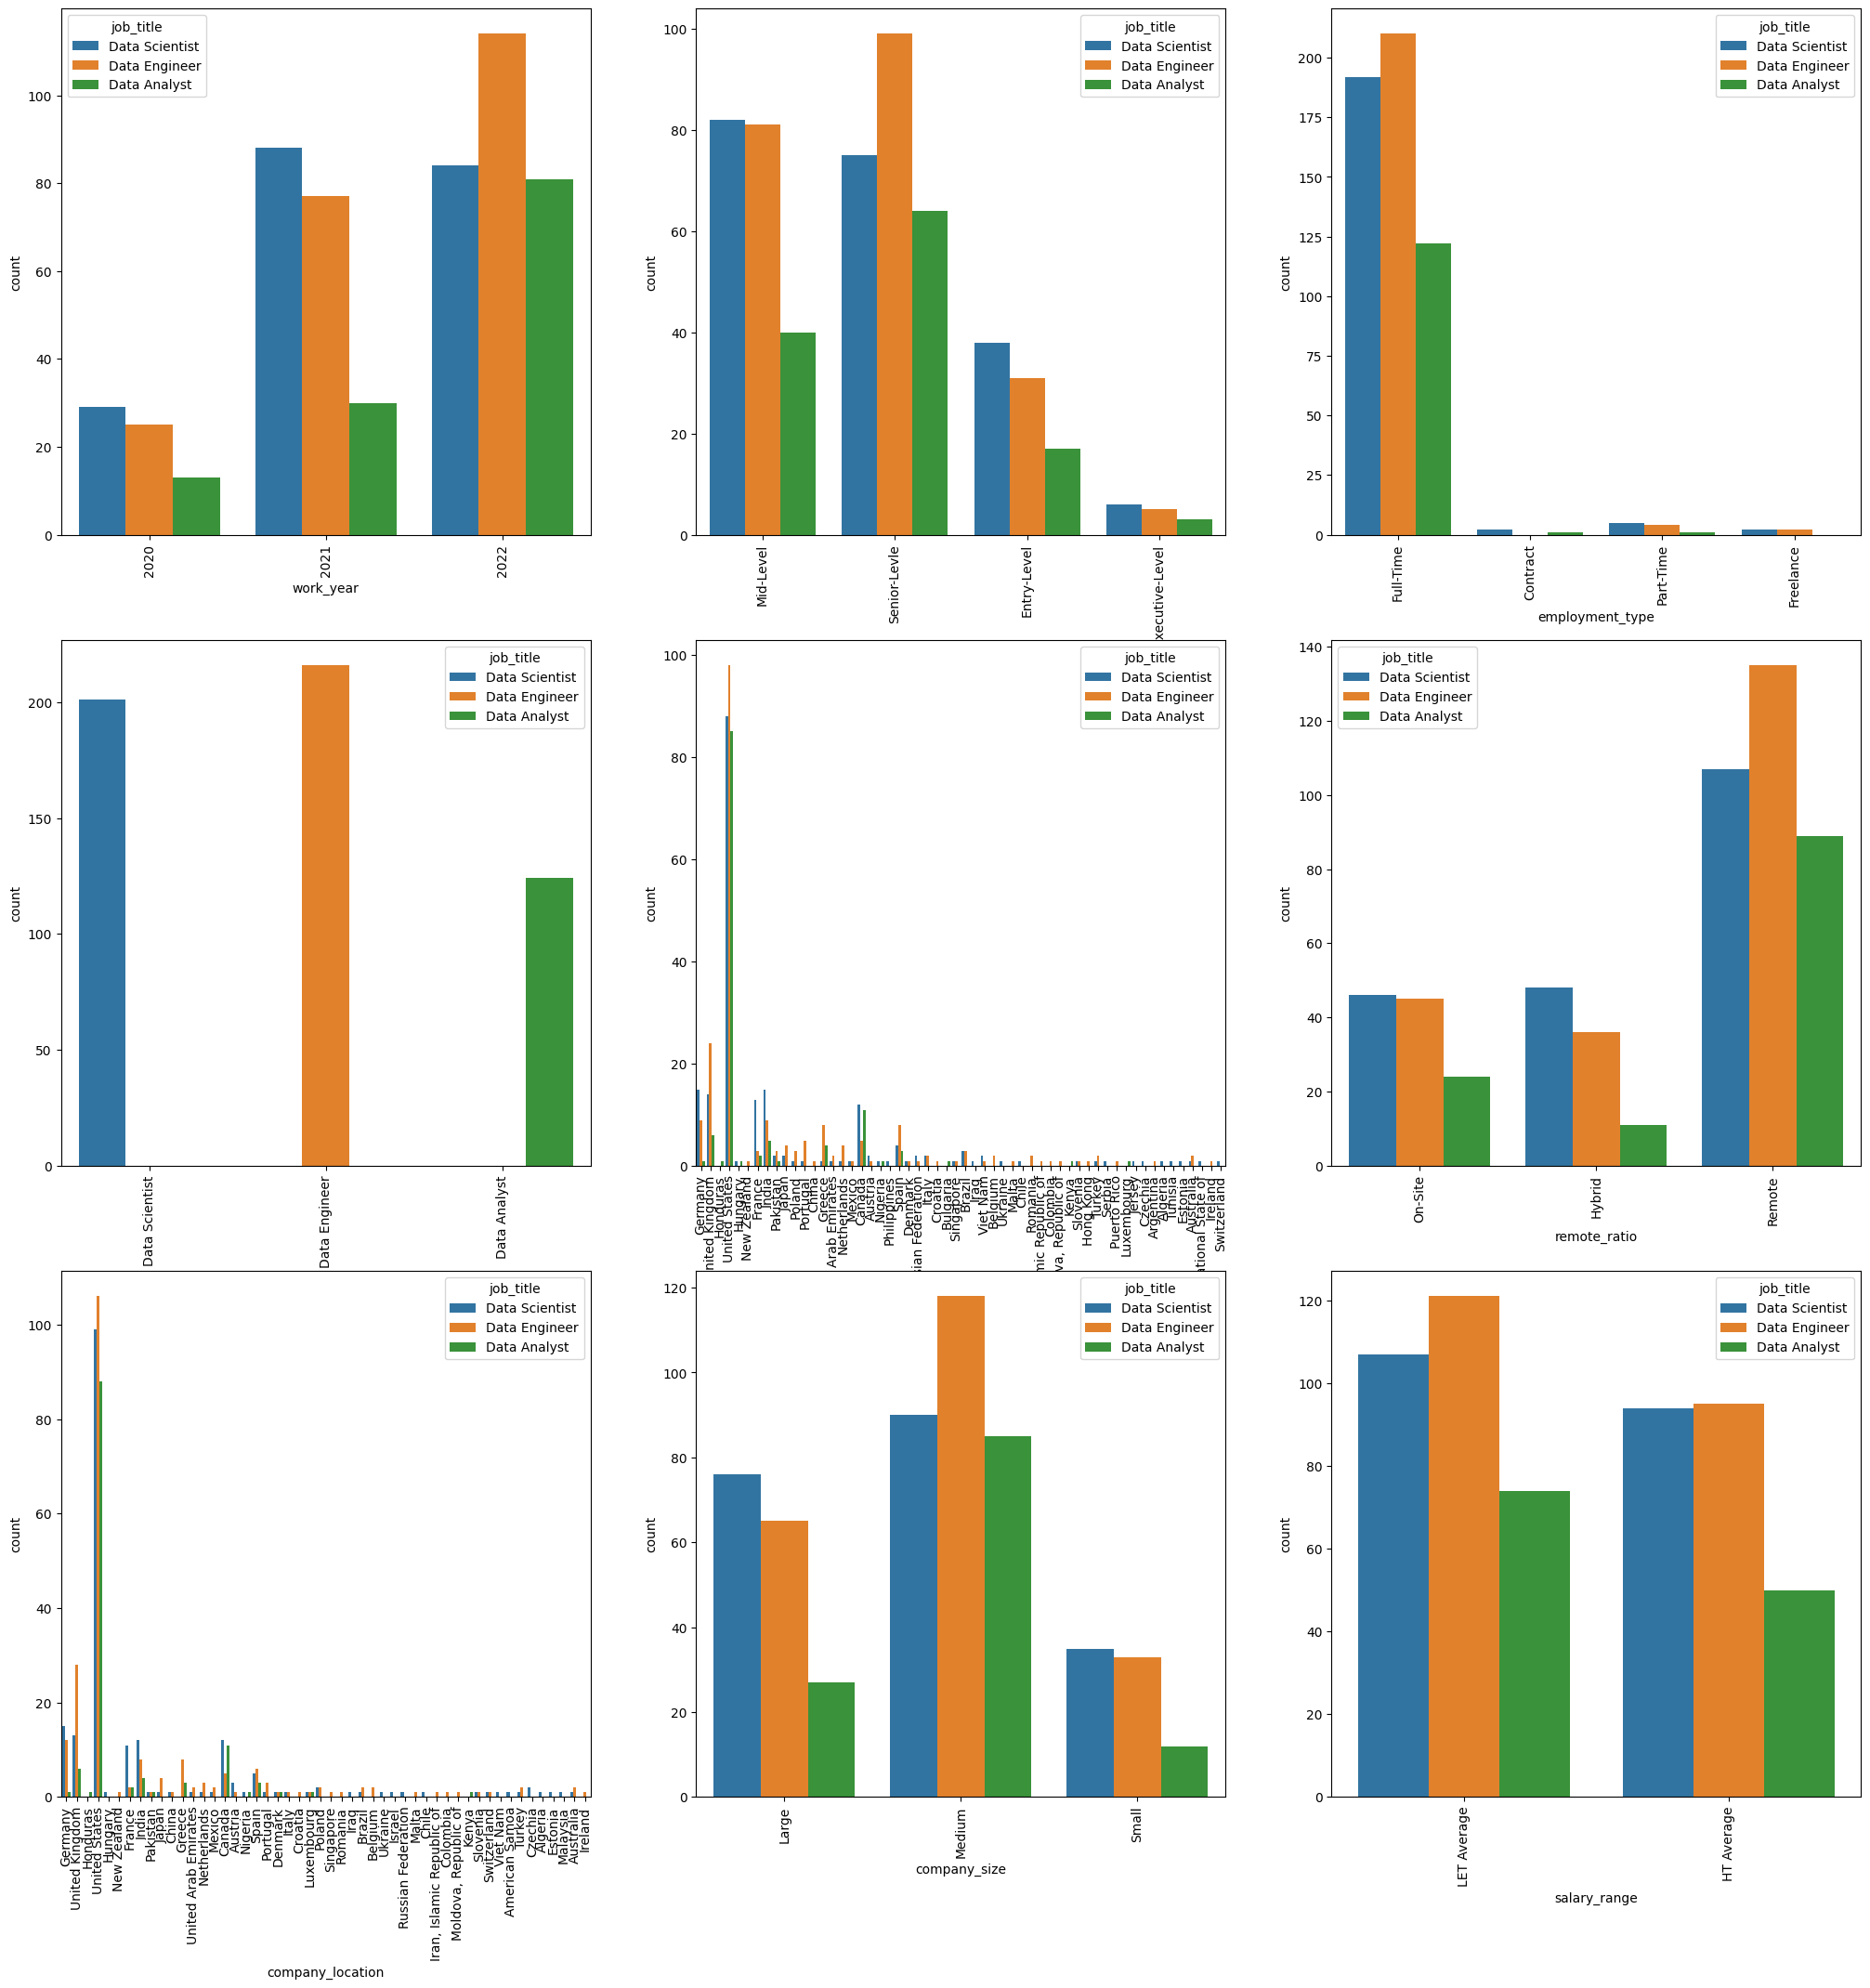

In [217]:
fig,axes = plt.subplots(kRows, kCols, figsize=(25,25))
for index,column in enumerate(categorical):
    axis=axes.flatten()[index]
    sns.countplot(x=column, hue='job_title', data=df, ax=axis)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
plt.show()

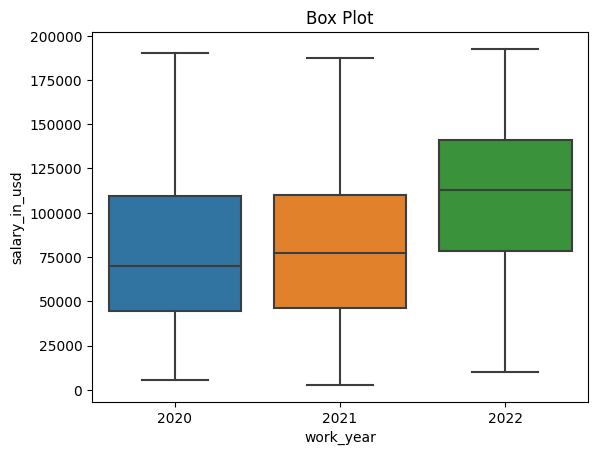

In [218]:


plt.figure()
sns.boxplot(x=df['work_year'], y=df['salary_in_usd'] ) 
plt.title('Box Plot')
plt.show()

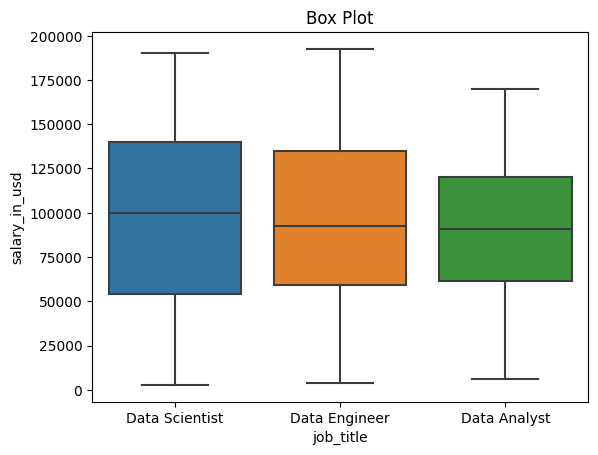

In [219]:
plt.figure()
sns.boxplot(x=df['job_title'], y=df['salary_in_usd'] ) 
plt.title('Box Plot')
plt.show()

<Figure size 640x480 with 0 Axes>

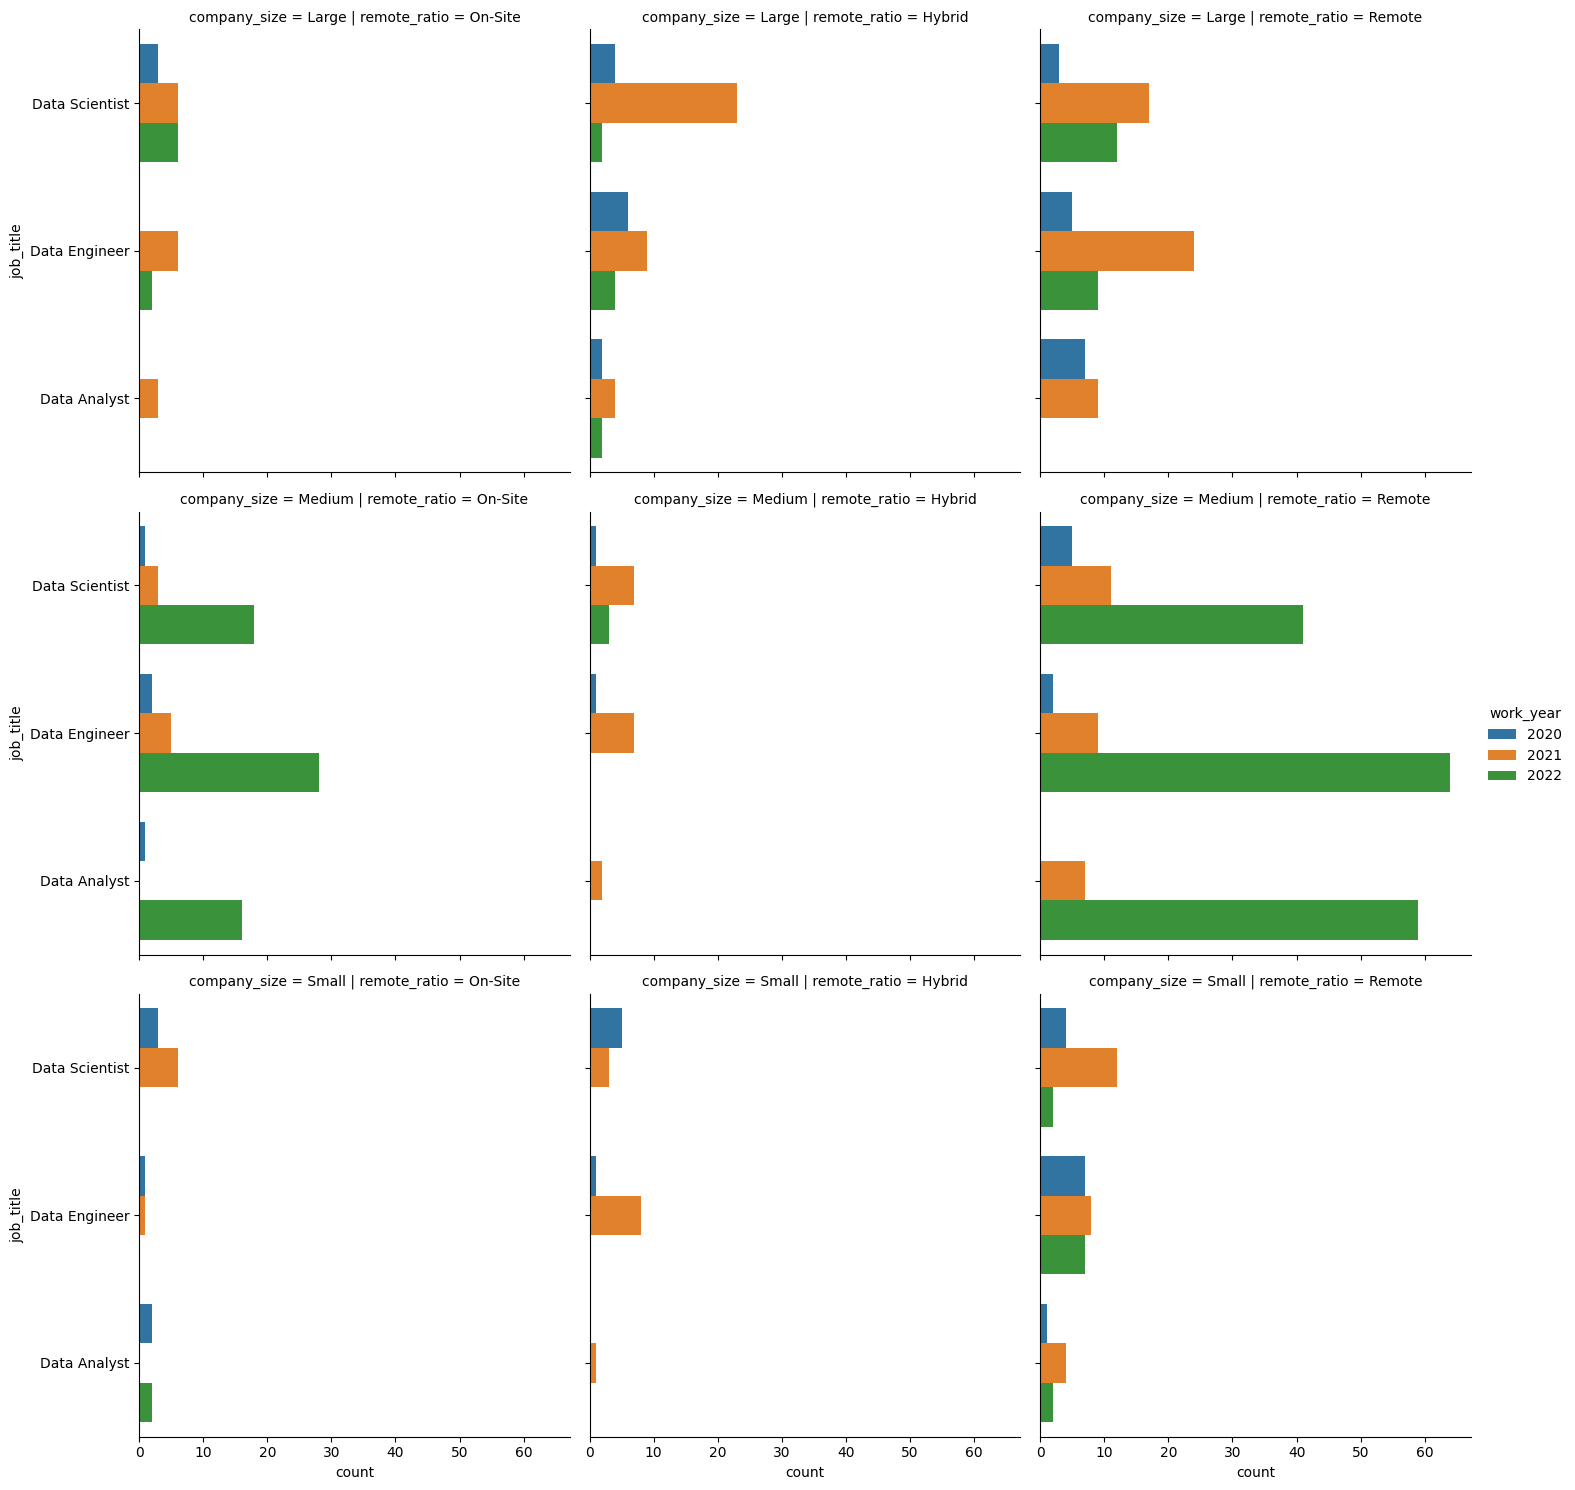

In [220]:
plt.figure()
sns.catplot(kind='count',y='job_title', hue='work_year', row='company_size',col='remote_ratio', data=df)
plt.show()

<Figure size 640x480 with 0 Axes>

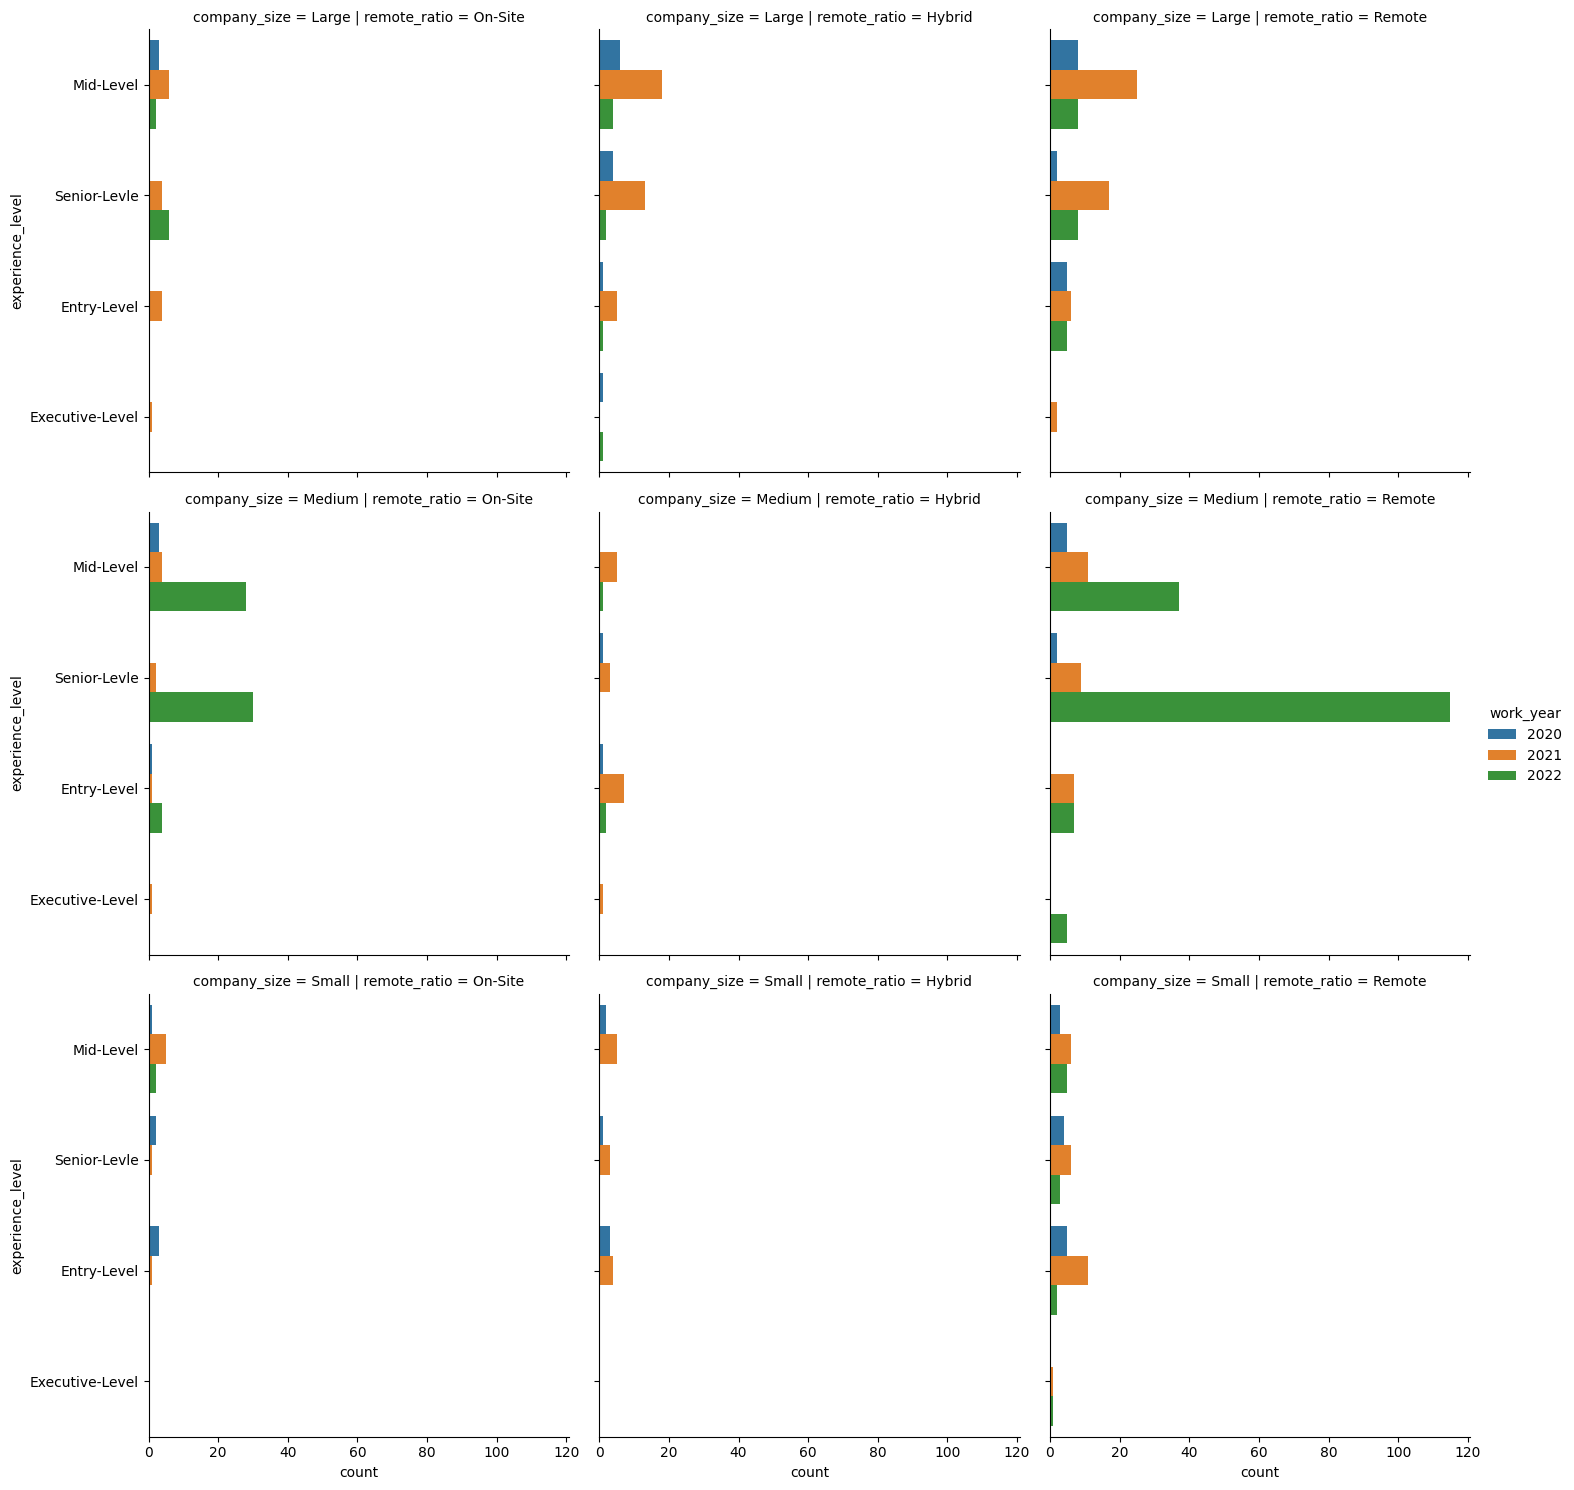

In [221]:
plt.figure()
sns.catplot(kind='count',y='experience_level', hue='work_year', row='company_size',col='remote_ratio', data=df)
plt.show()

<Figure size 640x480 with 0 Axes>

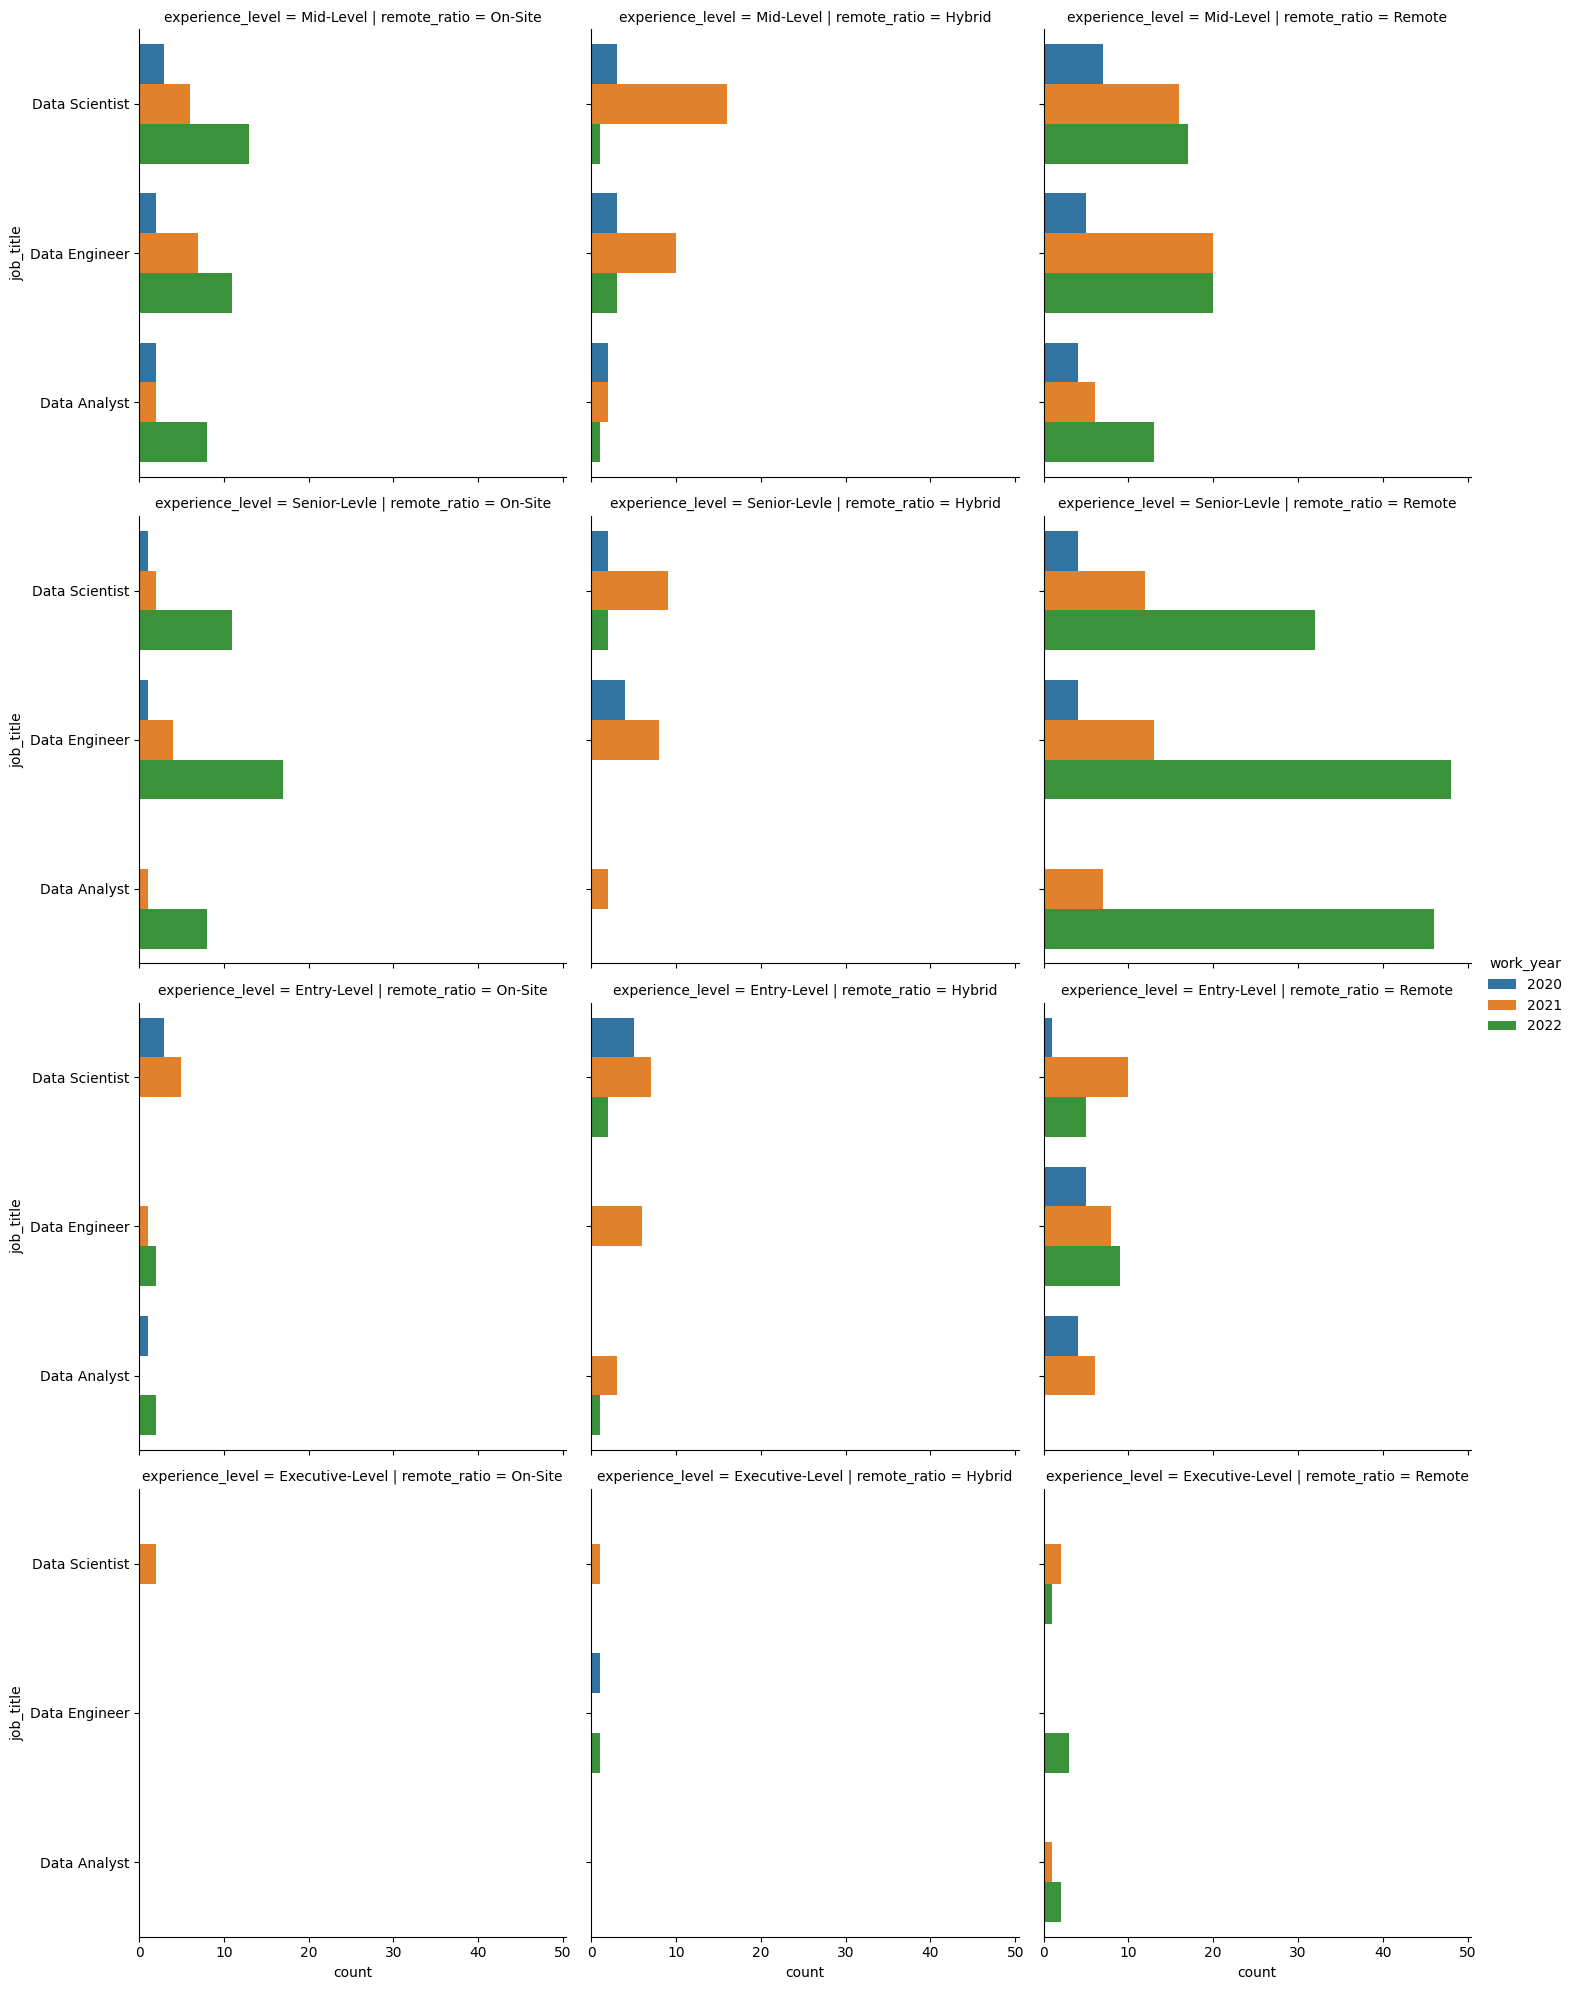

In [222]:
plt.figure()
sns.catplot(kind='count',y='job_title', hue='work_year', row='experience_level',col='remote_ratio', data=df)
plt.show()

### CrossTables & PivotTables

In [223]:
ctab = pd.crosstab(df['job_title'],df['work_year'])
display(ctab)

work_year       2020  2021  2022
job_title                       
Data Analyst      13    30    81
Data Engineer     25    77   114
Data Scientist    29    88    84

In [224]:
ctab = pd.crosstab(df['job_title'],df['experience_level'])
display(ctab)

experience_level  Entry-Level  Executive-Level  Mid-Level  Senior-Levle
job_title                                                              
Data Analyst               17                3         40            64
Data Engineer              31                5         81            99
Data Scientist             38                6         82            75

In [225]:
ctab = pd.crosstab(df['job_title'],df['company_size'])
display(ctab)

company_size    Large  Medium  Small
job_title                           
Data Analyst       27      85     12
Data Engineer      65     118     33
Data Scientist     76      90     35

In [226]:
pd.pivot_table(df, index=['work_year', 'experience_level', 'job_title'], aggfunc={'salary_in_usd' : np.mean})

salary_in_usd
work_year experience_level job_title                    
2020      Entry-Level      Data Analyst     55814.400000
                           Data Engineer    64079.400000
                           Data Scientist   47055.888889
          Executive-Level  Data Engineer    79833.000000
          Mid-Level        Data Analyst     60728.875000
                           Data Engineer    81275.500000
                           Data Scientist   77062.769231
          Senior-Levle     Data Engineer    97011.000000
                           Data Scientist  132175.714286
2021      Entry-Level      Data Analyst     52536.666667
                           Data Engineer    49864.266667
                           Data Scientist   60543.363636
          Executive-Level  Data Analyst    150000.000000
                           Data Scientist  116056.000000
          Mid-Level        Data Analyst     74238.700000
                           Data Engineer    71597.918919
                           Data Scientist   72621.000000
          Senior-Levle     Data Analyst    108616.700000
                           Data Engineer   112147.760000
                           Data Scientist  104272.869565
2022      Entry-Level      Data Analyst     73000.000000
                           Data Engineer    64134.181818
                           Data Scientist   64202.285714
          Executive-Level  Data Analyst    120000.000000
                           Data Engineer   126806.500000
                           Data Scientist  167875.000000
          Mid-Level        Data Analyst     68970.590909
                           Data Engineer    83237.205882
                           Data Scientist  100113.967742
          Senior-Levle     Data Analyst    113669.351852
                           Data Engineer   131388.461538
                           Data Scientist  139361.466667

In [227]:
pd.pivot_table(df, index=['work_year', 'experience_level', 'company_location', 'employment_type', 'job_title'], aggfunc= {'salary_in_usd' : np.mean})

salary_in_usd
work_year experience_level company_location employment_type job_title                    
2020      Entry-Level      Denmark          Full-Time       Data Scientist   45896.000000
                           France           Full-Time       Data Scientist   45618.500000
                           Germany          Full-Time       Data Engineer    54742.000000
                                                            Data Scientist   55997.000000
                                            Part-Time       Data Engineer    15966.000000
...                                                                                   ...
2022      Senior-Levle     United Kingdom   Full-Time       Data Engineer    71982.000000
                                                            Data Scientist  111245.500000
                           United States    Full-Time       Data Analyst    115110.900000
                                                            Data Engineer   139021.072727
                                                            Data Scientist  142847.075000

[196 rows x 1 columns]

# Foundings
## Univariate Plots
#### 1- Employement is more in 2022
#### 2- Most employed are Engineers, Scientists, Anaylysts, Respectively
#### 3- Most employed are Senior and Mid levels Full time jobs
#### 4- Remote working is the most common 
#### 5- Medium companies number is higher than large and small companies
#### 6- Medium companies number is higher than large and small companies
#### 7- Architets and Managers has the highest median Salary in USD 
#### 7- Scientists, Engineer and Analysts has approximately the same median Salary in USD, but Engineers and Scientist has a wider range.   

<hr/>

## Bivariate Plots
#### 1- in 2021 and 2022, Mid levels employment is approximately the same
#### 2- in 2022, Senior level is higher than any other experience level
#### 3- Full time jobs is more common than any other employement type in all years
#### 4- in 2022, Analyst and Scientists employment is the approximately the same
#### 5- in 2021, Engineer and Scientists employment is the approximately the same
#### 6- in 2022, Engineer is more common than any other job title
#### 7- in 2022, Remote working is more common than any other type
#### 8- in 2021, Large companies has hired more than Medium and Small companies
#### 9- in 2022, Medium companies has hired more than Large and Small companies with a huge differnece
#### 10- Medium companies has the highest rate of hiring Senior levels
#### 11- Medium companies has the highest rate of working remotley 
#### 12- Scientists and Engineers has approximately the same employment rate in Mid level
#### 13- Large companies has slightly higher Scientiests than Engineers
#### 13- Large companies has slightly higher Scientiests than Engineers
<hr/>

## Advanced Graphs
#### 1- in 2021, Large companies had the highest rate of working remotly
#### 2- in 2022, Medium companies has the highest rate of working remotly 
#### 3- in 2022, Senior levels has the highest rate of working remotly
<hr/>

## Tables
#### There are higher salary amounts in 2022 than the levels in 2021 and 2020. The levles in 20201 and 2020 are about roughly the same.

## Model Building

### Classification Preprocessing

#### To avoid missed outliers we read the data again

In [228]:
df = pd.read_csv('ds_salaries.csv')

df.drop(axis=1, columns=['Unnamed: 0', 'salary', 'salary_currency','employee_residence','remote_ratio'], inplace=True)


df = df.replace({'Machine Learning Scientist': 'Data Scientist',
                 'Product Data Analyst': 'Data Analyst',
                 'Lead Data Scientist': 'Data Scientist',
                 'Business Data Analyst': 'Data Analyst',
                 'Lead Data Analyst': 'Data Analyst',
                 'Data Science Consultant': 'Data Scientist',
                 'BI Data Analyst': 'Data Analyst',
                 'Director of Data Science': 'Data Scientist',
                 'Research Scientist': 'Data Scientist',
                 'Machine Learning Manager': 'Data Scientist',
                 'AI Scientist': 'Data Scientist',
                 'Principal Data Scientist': 'Data Scientist',
                 'Data Science Manager': 'Data Scientist',
                 'Head of Data': 'Data Scientist',
                 'Applied Data Scientist': 'Data Scientist',
                 'Marketing Data Analyst': 'Data Analyst',
                 'Financial Data Analyst': 'Data Analyst',
                 'Machine Learning Developer': 'Data Scientist',
                 'Applied Machine Learning Scientist': 'Data Scientist',
                 'Data Analytics Manager': 'Data Analyst',
                 'Head of Data Science': 'Data Scientist',
                 'Data Specialist': 'Data Scientist',
                 'Data Architect': 'Data Engineer',
                 'Principal Data Analyst': 'Data Analyst',
                 'Staff Data Scientist': 'Data Scientist',
                 'Big Data Architect': 'Data Engineer',
                 'Analytics Engineer': 'Data Engineer',
                 'ETL Developer': 'Data Engineer',
                 'Head of Machine Learning': 'Data Engineer',
                 'NLP Engineer': 'Data Engineer',
                 'Lead Machine Learning Engineer': 'Data Engineer',
                 'Data Analytics Lead': 'Data Analyst',
                 'Big Data Engineer': 'Data Engineer',
                 'Machine Learning Engineer': 'Data Engineer',
                 'Lead Data Engineer': 'Data Engineer',
                 'Machine Learning Infrastructure Engineer': 'Data Engineer',
                 'ML Engineer': 'Data Engineer',
                 'Computer Vision Engineer': 'Data Engineer',
                 'Data Analytics Engineer': 'Data Engineer',
                 'Cloud Data Engineer': 'Data Engineer',
                 'Computer Vision Software Engineer': 'Data Engineer',
                 'Director of Data Engineering': 'Data Engineer',
                 'Data Science Engineer': 'Data Engineer',
                 'Principal Data Engineer': 'Data Engineer',
                 '3D Computer Vision Researcher': 'Data Scientist',
                 'Data Engineering Manager': 'Data Engineer',
                 'Finance Data Analyst': 'Data Analyst'})

df.value_counts('company_location')
def not_usa(x):
    if x != 'US':
        return 0
    else:
        return 1

df['company_in_usa'] = df['company_location'].apply(not_usa)
df.drop(columns=['company_location'], inplace=True)

In [229]:
ndf = df.copy()


encoder1 = sk.LabelEncoder()
ndf['experience_level']=encoder1.fit_transform(ndf['experience_level'])
encoder2 = sk.LabelEncoder()
ndf['company_size']=encoder2.fit_transform(ndf['company_size'])
scaler1 = sk.StandardScaler()
ndf['salary_in_usd']=scaler1.fit_transform(ndf[['salary_in_usd']])
encoder4 = sk.LabelEncoder()
ndf['job_title']=encoder4.fit_transform(ndf['job_title'])

ndf.drop(columns=['employment_type'], inplace=True)

display(ndf.head())


work_year  experience_level  job_title  salary_in_usd  company_size  \
0       2020                 2          2      -0.457904             0   
1       2020                 3          2       2.083282             2   
2       2020                 3          1      -0.046177             1   
3       2020                 2          0      -1.301826             2   
4       2020                 3          1       0.531774             0   

   company_in_usa  
0               0  
1               0  
2               0  
3               0  
4               1

In [230]:
# make the job_title last column for consistency
classes = column_to_move = ndf.pop('job_title')
ndf.insert(len(ndf.columns), 'job_title', classes)
X = ndf.iloc[:,:-1].values
y = ndf.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([40, 71, 72]))

In [231]:

dtClf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
dtClf = dtClf.fit(X_train,y_train)

plt.figure(figsize =(10,10),dpi=1000)
tree.plot_tree(dtClf,feature_names=ndf.columns[:-1].tolist(),class_names=['0' ,'1', '2'],filled=True,rounded=True, max_depth=4); 
plt.show()

In [232]:
dt_y_pred = dtClf.predict(X_test)

print("Accuracy =",  accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix = \n", confusion_matrix(y_test, dt_y_pred))

Accuracy = 0.44808743169398907
Confusion Matrix = 
 [[15 11 14]
 [15 29 27]
 [10 24 38]]


In [233]:
NBClf = GaussianNB()   
NBClf.fit(X_train,y_train)

NB_y_pred = NBClf.predict(X_test)

print("Accuracy =",  accuracy_score(y_test, NB_y_pred))
print("Confusion Matrix = \n", confusion_matrix(y_test, NB_y_pred) )

Accuracy = 0.45901639344262296
Confusion Matrix = 
 [[11 21  8]
 [ 3 43 25]
 [ 1 41 30]]


In [234]:
# make the job_title last column for consistency
classes = column_to_move = ndf.pop('experience_level')
ndf.insert(len(ndf.columns), 'experience_level', classes)
display(ndf.head())
X = ndf.iloc[:,:-1].values
y = ndf.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
np.unique(y_test, return_counts=True)

work_year  salary_in_usd  company_size  company_in_usa  job_title  \
0       2020      -0.457904             0               0          2   
1       2020       2.083282             2               0          2   
2       2020      -0.046177             1               0          1   
3       2020      -1.301826             2               0          0   
4       2020       0.531774             0               1          1   

   experience_level  
0                 2  
1                 3  
2                 3  
3                 2  
4                 3

(array([0, 1, 2, 3]), array([23,  6, 66, 88]))

In [235]:

dtClf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
dtClf = dtClf.fit(X_train,y_train)

plt.figure(figsize =(10,10),dpi=1000)
tree.plot_tree(dtClf,feature_names=ndf.columns[:-1].tolist(),class_names=['0' ,'1', '2','3'],filled=True,rounded=True, max_depth=4); 
plt.show()

In [236]:
dt_y_pred = dtClf.predict(X_test)

print("Accuracy =",  accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix = \n", confusion_matrix(y_test, dt_y_pred))

Accuracy = 0.5191256830601093
Confusion Matrix = 
 [[ 6  0 11  6]
 [ 1  0  2  3]
 [12  1 33 20]
 [10  5 17 56]]


In [237]:
NBClf = GaussianNB()   
NBClf.fit(X_train,y_train)

NB_y_pred = NBClf.predict(X_test)



print("Accuracy =",  accuracy_score(y_test, NB_y_pred))
print("Confusion Matrix = \n", confusion_matrix(y_test, NB_y_pred) )

Accuracy = 0.5409836065573771
Confusion Matrix = 
 [[ 5  0 14  4]
 [ 0  0  2  4]
 [11  1 33 21]
 [ 5  2 20 61]]


## Regression

In [238]:
xdf = df.copy()

xdf = pd.get_dummies(xdf, columns=['experience_level', 'employment_type', 'job_title'], drop_first=True)
xdf.drop(axis=1, columns=['company_size', 'work_year'], inplace=True)
display(xdf.head())

salary_in_usd  company_in_usa  experience_level_EX  experience_level_MI  \
0          79833               0                    0                    1   
1         260000               0                    0                    0   
2         109024               0                    0                    0   
3          20000               0                    0                    1   
4         150000               1                    0                    0   

   experience_level_SE  employment_type_FL  employment_type_FT  \
0                    0                   0                   1   
1                    1                   0                   1   
2                    1                   0                   1   
3                    0                   0                   1   
4                    1                   0                   1   

   employment_type_PT  job_title_Data Engineer  job_title_Data Scientist  
0                   0                        0                         1  
1                   0                        0                         1  
2                   0                        1                         0  
3                   0                        0                         0  
4                   0                        1                         0

In [239]:
classes = column_to_move = xdf.pop('salary_in_usd')
xdf.insert(len(xdf.columns), 'salary_in_usd', classes)
X = xdf.iloc[:,:-1].values
y = xdf.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = sk.StandardScaler()
scaler.fit(np.c_[X_train,y_train])

A_train = scaler.transform(np.c_[X_train,y_train])
X_train = A_train[:,:-1]
y_train = A_train[:,-1]

A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,:-1]
y_test = A_test[:,-1]


reg1 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
print('The MSE using OLS is:', mean_squared_error(y_test, y_pred1))


reg2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], fit_intercept=False,cv=10).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
print('The MSE using Ridge is:', mean_squared_error(y_test, y_pred2))



reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
               fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)
print('The MSE using Lasso is:', mean_squared_error(y_test, y_pred3))


print(f'Model Score OLS: {reg1.score(X_train, y_train)} ')
print(f'Model Score Ridge: {reg2.score(X_train, y_train)}')
print(f'Model Score Lasso: {reg3.score(X_train, y_train)}')

The MSE using OLS is: 0.4754707239517468
The MSE using Ridge is: 0.4777145008780769
The MSE using Lasso is: 0.49175402289438724
Model Score OLS: 0.4344925193815504 
Model Score Ridge: 0.43382044073906034
Model Score Lasso: 0.4309408588756284


### Classification will be tested along with Regression 
### Classification will be based on 
#### 1- Salary
#### 2- Experience Level
#### 3- Work Year
#### 4- Remote Ratio
#### 5- Company Size
### Method:
#### First we should encode the data since the majority shows that it could be encoded with multiple class (Label Encoding) 
#### then we separate find the condition to find the proper classes
#### for each class a tree is created and the accuracy is found using Decision tree and Naive Bayes

#### First classification, the labels were jobs title
#### Second classification, the labels were expereince levels
### Problems:
#### Having 3 classse with similar data points would disturb the accuracy of the classification 
#### The issues is solved by creating 4 different datasets to check for each class alone 

### Results:
#### This concludes that there is a slight relationship between the salary, expereince level, work year, remote ratio, and company size and the job title
#### 1- Accuracy is low around 45% in both Naive Bayes and Decsion Tree 
#### 2- Accuracy is low around 48% in Decision Tree and 53% in Naive Bayes 

<hr/>

### Regression will be based on 
#### 1- Salary
#### 2- Experience Level
#### 3- Work Year
#### 4- Remote Ratio
#### 5- Company Size
### Method:
#### First we should encode the data since it should be scaled (Standard and one hot encoding)
#### then we make price in USD as an output 
#### The model will involve OLS, Ridge, Lasso Tests and each will have an accuracy depending on the model score and Mean Square Error

### Problems:
#### Data points are similar, Model Score and Mean Square Error values are not as high as they should be for th price to be predicted 
#### but they are not as bad

### Results:
#### This concludes that there is a slight relationship between the salary, expereince level, work year, remote ratio, and company size and the job title
#### The MSE for all methods is around 0.47, and the Model Score for all methods is around 0.43 the best values in both is given by OLS method.


# Conclusion:
#### The dataset contains: Salary in USD for data science Jobs, it has different job titles, company sizes, company locations and employee resedinces, it also contains the remote ratio and in which year was the data taken
#### We reduced the data, removed the outliers by scaling or deleting inplace, analysed the data using graphs and calculations
#### We used the graphs to plan the modelling and find a suitable output columns to classify or find the value of it. 
#### We used two models Classfication and Regression.
#### In Classfication we used decision tree and Naive Bayes.
#### We tested its predictability of the model using accuracy and confusion matrix.
#### In regression we used OLS method, Ridge method and Lasso method to calculate the regression. 
#### We tested its predictability of the model using MSE.

## Recommendations:

#### 1- Data science specalists should not choose their specific majors depending on the salary since there is not a clear cut on the salary, all majors roughly has the same salary.
#### 2- Data science specalists should not differentiate between the company size and the salary since it does not differ much 
#### 3- Data science specalists should gain expereince to raise their expereince level to raise their salary